In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from matplotlib import pyplot as plt
import plotnine as pn
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3, 3), transparent=True, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
adjustText          NA
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
descartes           NA
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_serv

In [119]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D7PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D10PI/outs/filtered_feature_bc_matrix.h5')


reading ./../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [120]:
Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
T1L_K287T_Heart_D4PI_sc.var_names_make_unique()
T1L_K287T_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()
T1L_K287T_Heart_D10PI_sc.var_names_make_unique()

In [121]:
samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_T1L-K287T_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_T1L-K287T_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI", "Heart_T1L-K287T_D10PI"]


In [122]:
heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D4PI_sc, T1L_K287T_Heart_D4PI_sc, 
                                                    Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
                                                    T1L_K287T_Heart_D7PI_sc, 
                                                    Mock_Heart_D10PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    T1L_K287T_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=samples,
                                                    index_unique="-")

In [123]:
heart_infection_sc.obs_names_make_unique()
heart_infection_sc.var_names_make_unique()

In [124]:
print(heart_infection_sc.shape)

(58527, 54848)


In [125]:
reoviral_genes = [name for name in heart_infection_sc.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc.var_names, reoviral_genes)
heart_infection_sc_no_viral_genes = heart_infection_sc[:, ~reoviral_genes_indicator]
heart_infection_sc_no_viral_genes.var_names = [name.split("_")[1] for name in heart_infection_sc_no_viral_genes.var_names]
heart_infection_sc_no_viral_genes.obs = heart_infection_sc_no_viral_genes.obs.join(viral_expression.astype(int))
print(heart_infection_sc_no_viral_genes.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(58527, 54838)


In [126]:
heart_infection_sc_no_viral_genes.obs

sample  T1LReoS1  \
AAACCCAAGCACCTGC-1-Heart_Mock_D4PI              Heart_Mock_D4PI         0   
AAACCCAAGGCTTAGG-1-Heart_Mock_D4PI              Heart_Mock_D4PI         0   
AAACCCACACTAGGCC-1-Heart_Mock_D4PI              Heart_Mock_D4PI         0   
AAACCCACACTTTAGG-1-Heart_Mock_D4PI              Heart_Mock_D4PI         0   
AAACCCAGTGTCTTCC-1-Heart_Mock_D4PI              Heart_Mock_D4PI         0   
...                                                         ...       ...   
TTTGTTGAGCCAAGCA-1-Heart_T1L-K287T_D10PI  Heart_T1L-K287T_D10PI         0   
TTTGTTGAGCTCGGCT-1-Heart_T1L-K287T_D10PI  Heart_T1L-K287T_D10PI         0   
TTTGTTGAGGATACCG-1-Heart_T1L-K287T_D10PI  Heart_T1L-K287T_D10PI         0   
TTTGTTGCACTTCAAG-1-Heart_T1L-K287T_D10PI  Heart_T1L-K287T_D10PI         0   
TTTGTTGGTGCTCTTC-1-Heart_T1L-K287T_D10PI  Heart_T1L-K287T_D10PI         0   

                                          T1LReoS2  T1LReoS3  T1LReoS4  \
AAACCCAAGCACCTGC-1-Heart_Mock_D4PI               0         0         0   
AAACCCAAGGCTTAGG-1-Heart_Mock_D4PI               0         0         0   
AAACCCACACTAGGCC-1-Heart_Mock_D4PI               0         0         0   
AAACCCACACTTTAGG-1-Heart_Mock_D4PI               0         0         0   
AAACCCAGTGTCTTCC-1-Heart_Mock_D4PI               0         0         0   
...                                            ...       ...       ...   
TTTGTTGAGCCAAGCA-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGAGCTCGGCT-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGAGGATACCG-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGCACTTCAAG-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGGTGCTCTTC-1-Heart_T1L-K287T_D10PI         0         0         0   

                                          T1LReoM1  T1LReoM2  T1LReoM3  \
AAACCCAAGCACCTGC-1-Heart_Mock_D4PI               0         0         0   
AAACCCAAGGCTTAGG-1-Heart_Mock_D4PI               0         0         0   
AAACCCACACTAGGCC-1-Heart_Mock_D4PI               0         0         0   
AAACCCACACTTTAGG-1-Heart_Mock_D4PI               0         0         0   
AAACCCAGTGTCTTCC-1-Heart_Mock_D4PI               0         0         0   
...                                            ...       ...       ...   
TTTGTTGAGCCAAGCA-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGAGCTCGGCT-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGAGGATACCG-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGCACTTCAAG-1-Heart_T1L-K287T_D10PI         0         0         0   
TTTGTTGGTGCTCTTC-1-Heart_T1L-K287T_D10PI         0         0         0   

                                          T1LReoL1  T1LReoL2  T1LReoL3  
AAACCCAAGCACCTGC-1-Heart_Mock_D4PI               0         0         0  
AAACCCAAGGCTTAGG-1-Heart_Mock_D4PI               0         0         0  
AAACCCACACTAGGCC-1-Heart_Mock_D4PI               0         0         0  
AAACCCACACTTTAGG-1-Heart_Mock_D4PI               0         0         0  
AAACCCAGTGTCTTCC-1-Heart_Mock_D4PI               0         0         0  
...                                            ...       ...       ...  
TTTGTTGAGCCAAGCA-1-Heart_T1L-K287T_D10PI         0         0         0  
TTTGTTGAGCTCGGCT-1-Heart_T1L-K287T_D10PI         0         0         0  
TTTGTTGAGGATACCG-1-Heart_T1L-K287T_D10PI         0         0         0  
TTTGTTGCACTTCAAG-1-Heart_T1L-K287T_D10PI         0         0         0  
TTTGTTGGTGCTCTTC-1-Heart_T1L-K287T_D10PI         0         0         0  

[58527 rows x 11 columns]

In [127]:
sc.pp.filter_cells(heart_infection_sc_no_viral_genes, min_counts=1)
sc.pp.filter_genes(heart_infection_sc_no_viral_genes, min_cells=1)

filtered out 2 cells that have less than 1 counts
filtered out 20115 genes that are detected in less than 1 cells


In [128]:
heart_infection_sc_no_viral_genes.var['mt'] = heart_infection_sc_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(heart_infection_sc_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [129]:
heart_infection_sc_no_viral_genes.obs['total_viral'] = viral_expression.sum(axis=1).astype(int)
heart_infection_sc_no_viral_genes.obs['pct_viral'] = ((heart_infection_sc_no_viral_genes.obs['total_viral']) / (heart_infection_sc_no_viral_genes.obs['total_viral'] + heart_infection_sc_no_viral_genes.obs['total_counts']))

In [130]:
heart_infection_sc_no_viral_genes.obs["stage"] = [x.split("_")[2] for x in heart_infection_sc_no_viral_genes.obs["sample"]]
heart_infection_sc_no_viral_genes.obs["state"] = [x.split("_")[1] for x in heart_infection_sc_no_viral_genes.obs["sample"]]
heart_infection_sc_no_viral_genes.obs["stage"] = heart_infection_sc_no_viral_genes.obs["stage"].astype("category")
heart_infection_sc_no_viral_genes.obs["state"] = heart_infection_sc_no_viral_genes.obs["state"].astype("category")
heart_infection_sc_no_viral_genes.obs["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
heart_infection_sc_no_viral_genes.obs["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT", "T1L-K287T"], inplace = True)
heart_infection_sc_no_viral_genes.obs["condition"] = [heart_infection_sc_no_viral_genes.obs["state"][i] + "_" + heart_infection_sc_no_viral_genes.obs["stage"][i] for i in range(heart_infection_sc_no_viral_genes.shape[0])]
heart_infection_sc_no_viral_genes.obs["condition"] = heart_infection_sc_no_viral_genes.obs["condition"].astype("category")
heart_infection_sc_no_viral_genes.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI", "T1L-K287T_D4PI", "Mock_D7PI", "T1L-WT_D7PI", "T1L-K287T_D7PI", "Mock_D10PI", "T1L-WT_D10PI", "T1L-K287T_D10PI"], inplace = True)

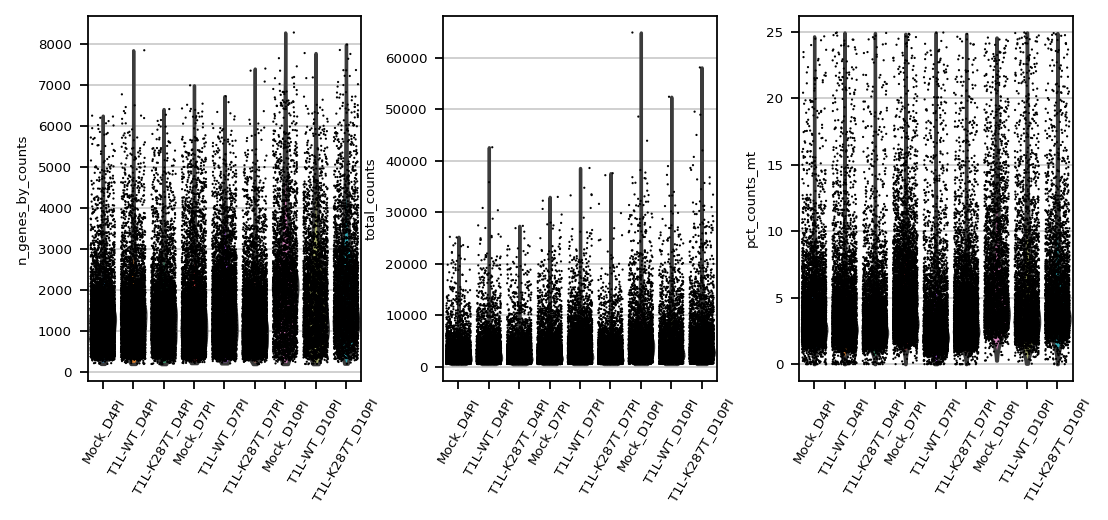

In [253]:
sc.pl.violin(heart_infection_sc_no_viral_genes, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True, stripplot=True, groupby = "condition", rotation= 60)

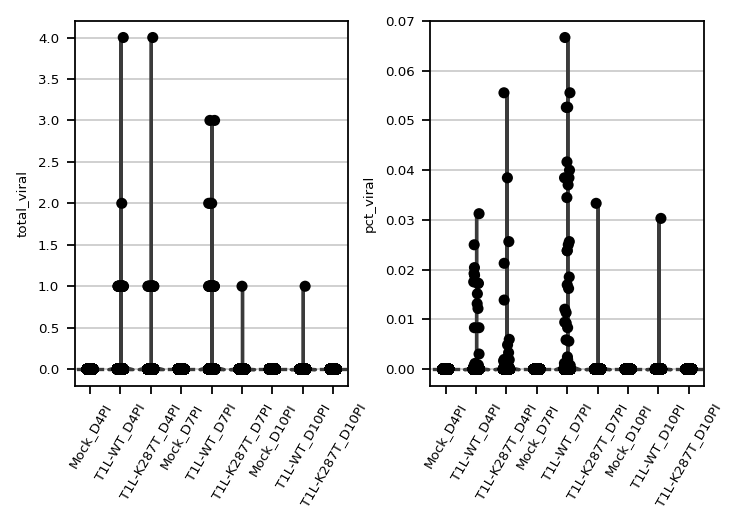

In [138]:
sc.pl.violin(heart_infection_sc_no_viral_genes, ["total_viral", "pct_viral"],
             jitter=1, size = 5.0, multi_panel=True, stripplot=True, groupby = "condition", rotation= 60)

In [139]:
heart_infection_sc_no_viral_genes = heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs.pct_counts_mt < 25, :]

In [140]:
print(heart_infection_sc_no_viral_genes.shape)

(55261, 34723)


In [141]:
sc.pp.filter_cells(heart_infection_sc_no_viral_genes, min_genes=200)
sc.pp.filter_genes(heart_infection_sc_no_viral_genes, min_cells=10)

filtered out 6806 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 10446 genes that are detected in less than 10 cells


In [142]:
print(heart_infection_sc_no_viral_genes.shape)

(48455, 24277)


In [143]:
# heart_infection_sc_no_viral_genes.write_h5ad("./../pyobjs/heart_infection_sc_no_viral_genes_raw_counts.h5ad")

In [144]:
sc.pp.normalize_total(heart_infection_sc_no_viral_genes, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [145]:
sc.pp.log1p(heart_infection_sc_no_viral_genes)

In [146]:
sc.pp.highly_variable_genes(heart_infection_sc_no_viral_genes, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


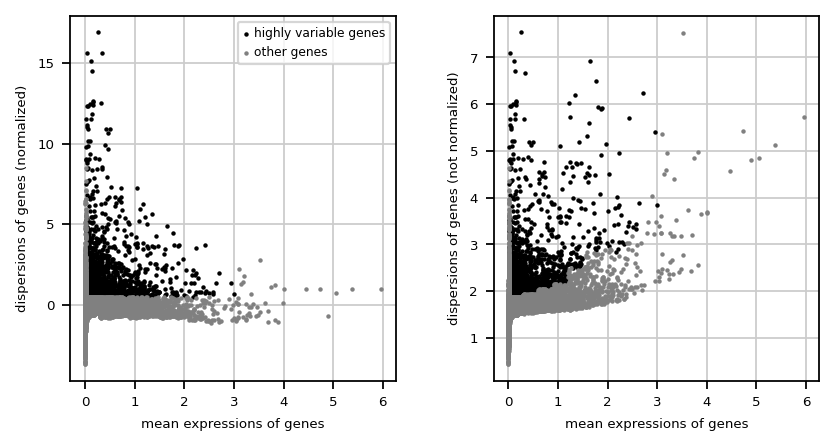

In [147]:
sc.pl.highly_variable_genes(heart_infection_sc_no_viral_genes, )

In [148]:
s_genes = list(pd.read_csv("./../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [149]:
sc.tl.score_genes_cell_cycle(heart_infection_sc_no_viral_genes, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    503 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    587 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [150]:
heart_infection_sc_no_viral_genes.raw = heart_infection_sc_no_viral_genes
heart_infection_sc_no_viral_genes = heart_infection_sc_no_viral_genes[:, heart_infection_sc_no_viral_genes.var.highly_variable]


In [151]:
sc.pp.regress_out(heart_infection_sc_no_viral_genes, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:04:13)


In [152]:
heart_infection_sc_no_viral_genes.X.shape

(48455, 2196)

In [153]:
sc.pp.scale(heart_infection_sc_no_viral_genes, max_value=10)

In [154]:
sc.tl.pca(heart_infection_sc_no_viral_genes)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:10)


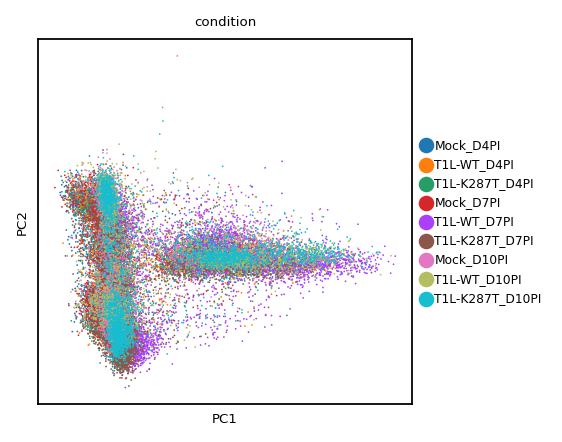

In [155]:
sc.pl.pca(heart_infection_sc_no_viral_genes, color = ["condition"])

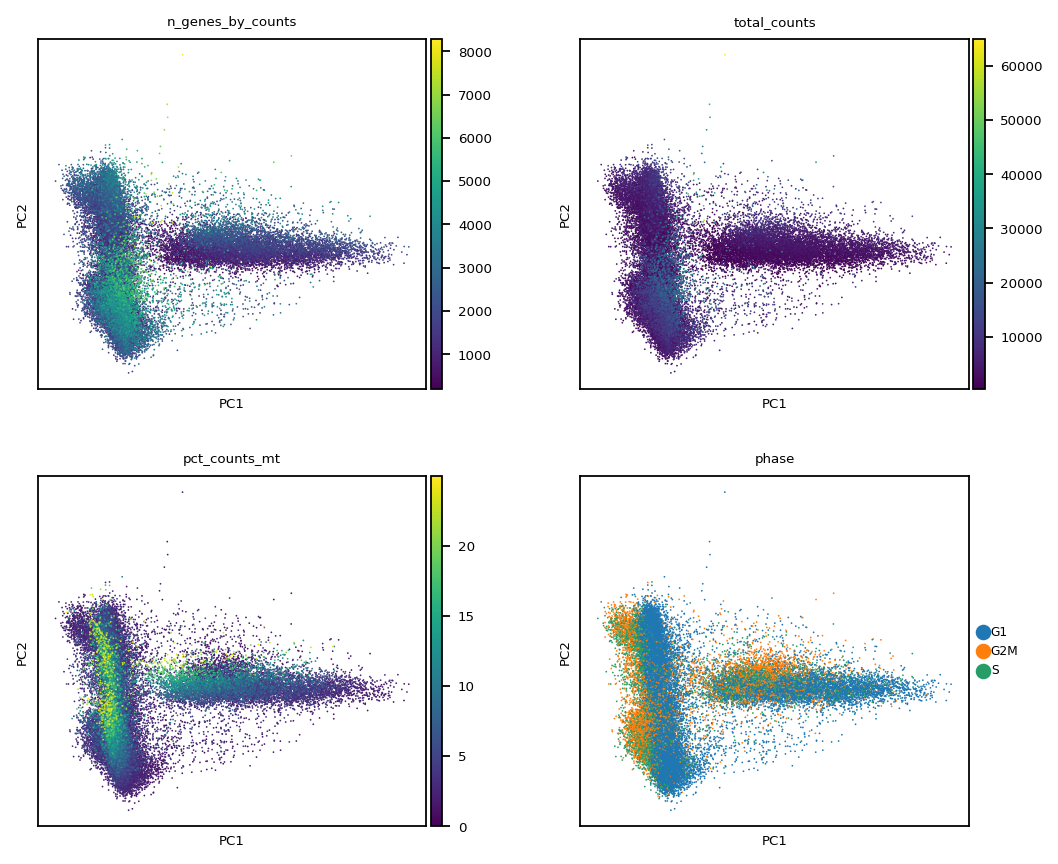

In [156]:
sc.pl.pca(heart_infection_sc_no_viral_genes, color = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'phase'], ncols=2)

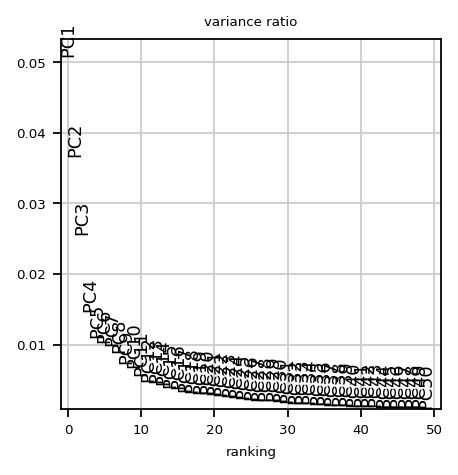

In [157]:
sc.pl.pca_variance_ratio(heart_infection_sc_no_viral_genes, n_pcs = 50)

In [158]:
sc.pp.neighbors(heart_infection_sc_no_viral_genes, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [159]:
sc.tl.umap(heart_infection_sc_no_viral_genes)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:35)


In [326]:
sc.tl.embedding_density(heart_infection_sc_no_viral_genes, groupby = "condition")

computing density on 'umap'
--> added
    'umap_density_condition', densities (adata.obs)
    'umap_density_condition_params', parameter (adata.uns)


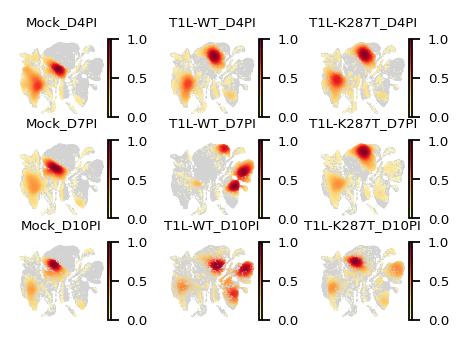

In [331]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=False , figsize=(0.7, 0.7), transparent=True, format="pdf")
sc.pl.embedding_density(heart_infection_sc_no_viral_genes, groupby = "condition", bg_dotsize=1, wspace=0.5, hspace=0.3, fg_dotsize=1, ncols=3, save="allsamples") 
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, format="pdf")

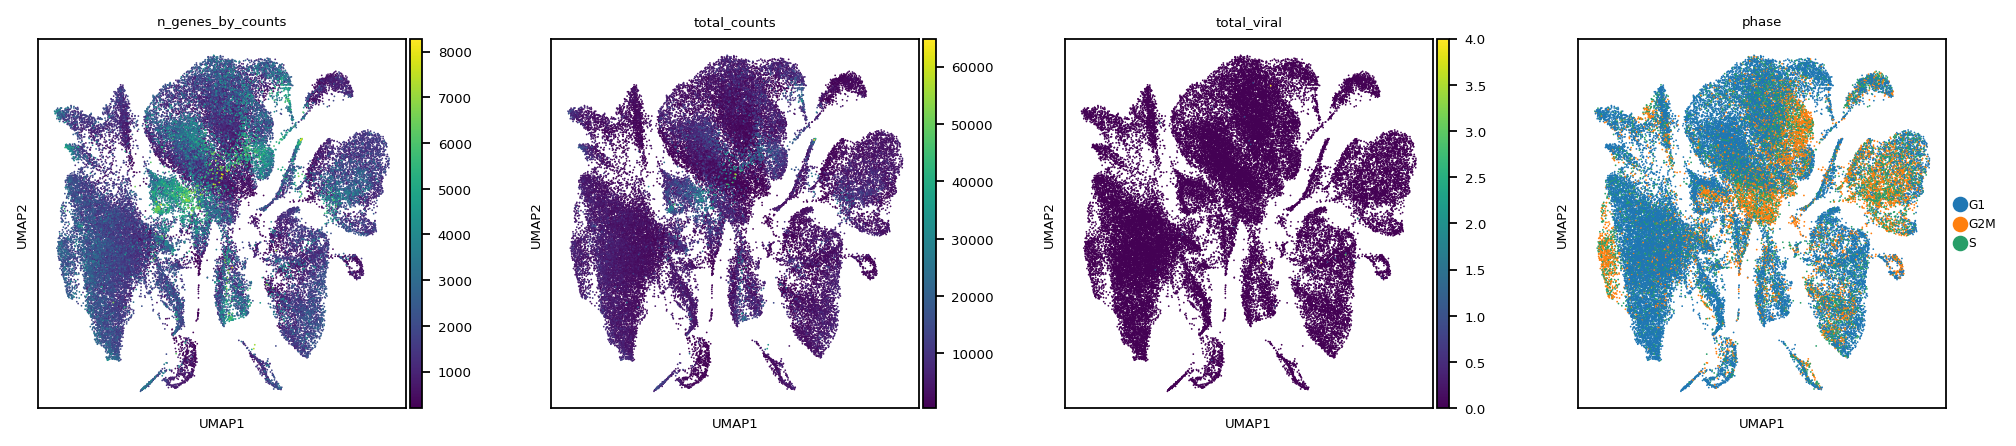

In [162]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['n_genes_by_counts', 'total_counts', 'total_viral', "phase"])

In [163]:
sc.tl.leiden(heart_infection_sc_no_viral_genes, key_added="leiden_0.6", resolution = 0.6)
sc.tl.leiden(heart_infection_sc_no_viral_genes, key_added="leiden_0.5", resolution = 0.5)
sc.tl.leiden(heart_infection_sc_no_viral_genes, key_added="leiden_0.3", resolution = 0.3)

running Leiden clustering
    finished: found 26 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:09)
running Leiden clustering
    finished: found 22 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:07)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:10)


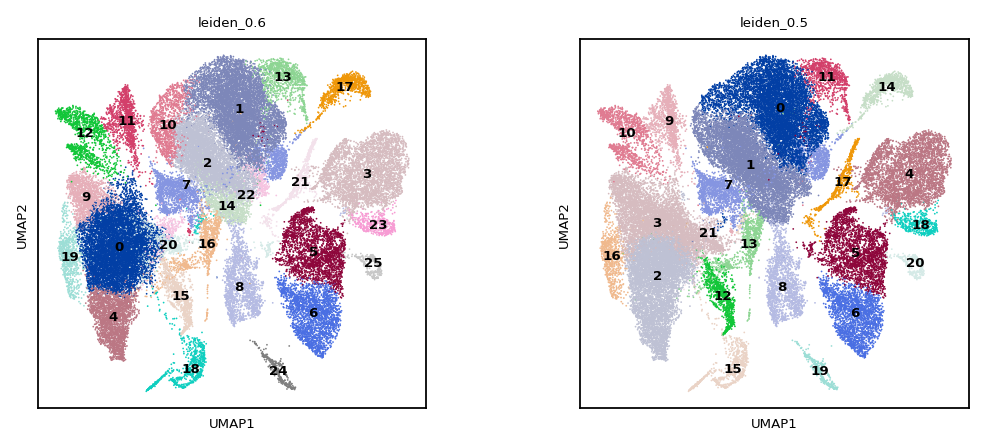

In [166]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['leiden_0.6', 'leiden_0.5'], legend_loc='on data')

In [168]:
heart_infection_sc_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")


In [108]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")

In [169]:
sc.tl.rank_genes_groups(heart_infection_sc_no_viral_genes, 'leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:10)


In [170]:
sc.tl.dendrogram(heart_infection_sc_no_viral_genes, "leiden_0.5", n_pcs=20)

    using 'X_pca' with n_pcs = 20
Storing dendrogram info using `.uns['dendrogram_leiden_0.5']`


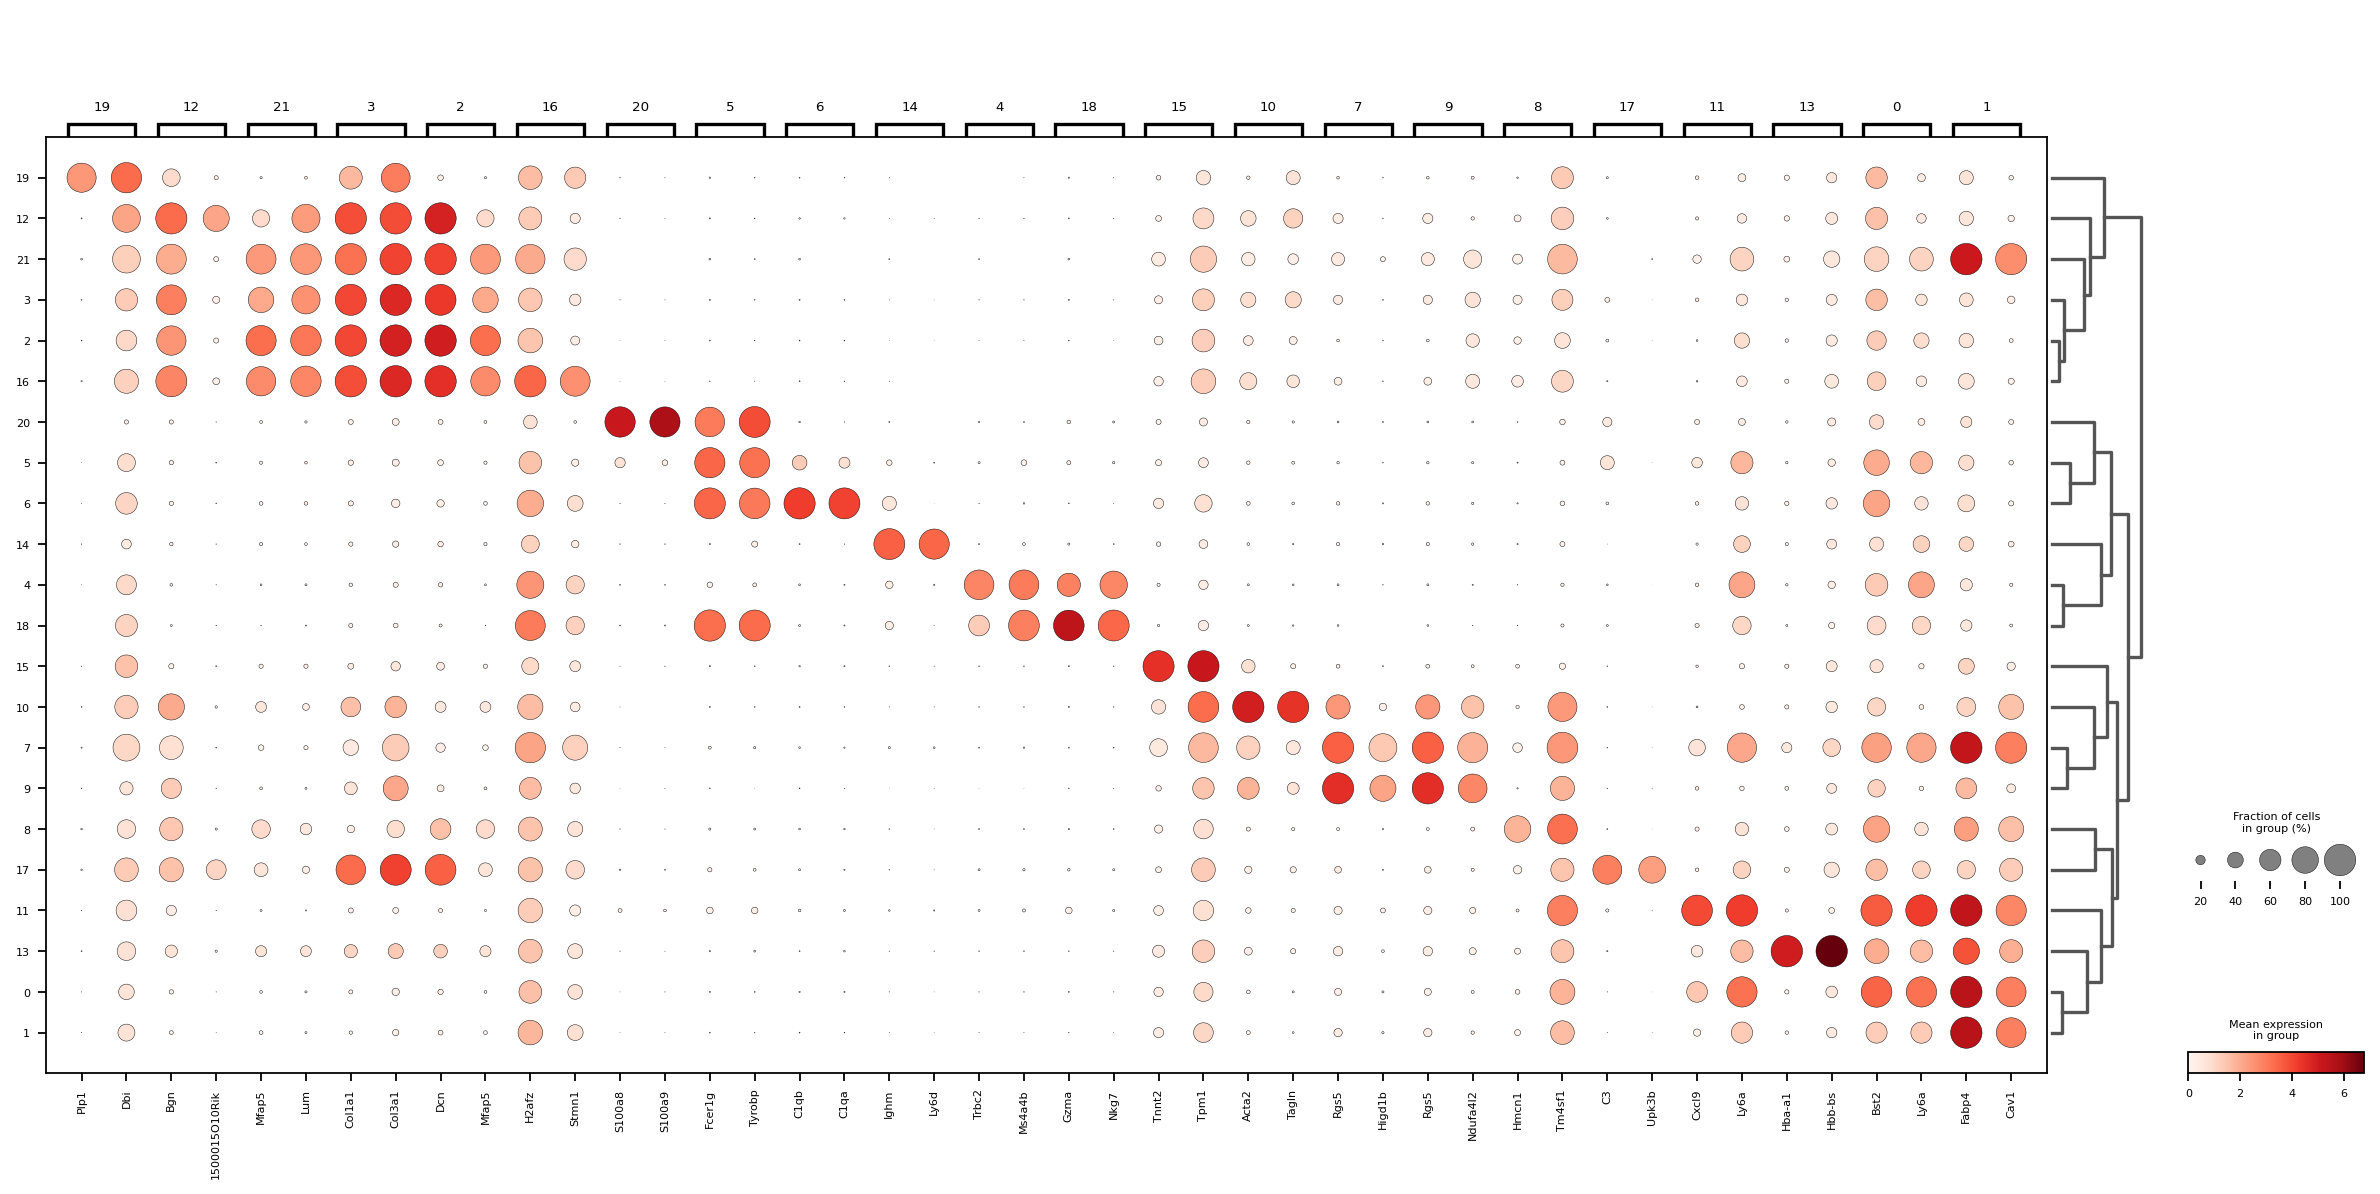

In [183]:
sc.pl.rank_genes_groups_dotplot(heart_infection_sc_no_viral_genes, key= "rank_genes_groups_leiden_0.5", n_genes=2)

In [180]:
pd.DataFrame(heart_infection_sc_no_viral_genes.uns['rank_genes_groups_leiden_0.5']['names']).head(40)

0         1        2        3         4         5         6  \
0      Bst2     Fabp4      Dcn   Col1a1     Trbc2    Fcer1g      C1qb   
1      Ly6a      Cav1    Mfap5   Col3a1    Ms4a4b    Tyrobp      C1qa   
2    Ifitm3      Cdh5   Col3a1   Col1a2      Cd3g      Ctss      C1qc   
3     Fabp4      Cd36      Lum      Bgn      Cd3d    Lgals3    Fcer1g   
4      Cd36   Gpihbp1      Gsn    Mfap4      Cd52     Cebpb       Pf4   
5     Egfl7      Mgll   Col1a1      Mgp    Coro1a      Cyba      Apoe   
6   Gpihbp1   Sparcl1     Aspn    Fstl1      Rac2      Cd52    Tyrobp   
7     H2-K1    Col4a1    Itm2a      Eln   Ptprcap      Lyz2      Lgmn   
8      Cav1       Kdr    Postn     Rbp1     Ptprc      Spi1      Ctsc   
9     Rsad2   Tspan13    Fstl1   Igfbp7      Nkg7     Prdx5      Ctsb   
10    Iigp1    Cavin2   Col1a2      Dpt   Arhgdib     Plac8      Ftl1   
11     Gbp7     Cldn5   Col6a1      Dcn    Tmsb4x      Lst1      Aif1   
12     Ly6e      Cd93   Col5a1  Col14a1      Ccl5      Ctsc      Fth1   
13      B2m     Gng11      Dpt      Lum      Trac      Fth1      Ctss   
14    H2-D1    Pecam1     Fbn1      Mdk    Ms4a6b    Coro1a      Lyz2   
15     Cdh5     Fabp5      Ogn    Postn  Sh3bgrl3      Ftl1    Tmsb4x   
16    Ly6c1      Kitl   Col6a2    Mfap2     Rps11    Ms4a6c    Laptm5   
17      Kdr     Egfl7    Lamc1    Loxl1       Lck    Laptm5      Ly86   
18    Icam2     Tcf15  Col14a1   Igfbp4  AW112010   Alox5ap     Csf1r   
19   Cavin2    Col4a2   Clec3b  Adamts2      Pfn1      Actb      Cyba   
20    Ifit2      Tcf4    Itih5    Fbln1    Epsti1      Ctsb     Fcgr3   
21     Rgcc     Myct1     Meg3   Col5a1     Rpl32    Ms4a4c       Maf   
22    Cldn5      Tcim   Col5a2     Rcn3      Gzmb      Aif1      Dab2   
23   Pecam1      Esam     Tnxb     Fbn1    Laptm5      Cybb   Alox5ap   
24     Cd93      Rgcc    Pcsk6   Col5a2     Fxyd5    Samhd1     Rgs10   
25    Gng11      Ets1    Lama2    Sparc    Ptpn18      Psap      Cst3   
26  Sparcl1     Icam2    Loxl1     Ctsl      Actb       B2m     Ms4a7   
27    Isg15     Gnai2  Adamts5      Gsn       Lat     Slfn2      Actb   
28     Mgll    Adgrf5     Mmp2   Pmepa1    Pycard       Fyb      Mrc1   
29     Irf7     Rflnb   S100a6   Col6a1    Selplg  Ifi27l2a      Clta   
30     Gbp4      Flt1      Fn1     Meg3   Dnajc15     Ifi30    Ms4a6c   
31    H2-Q7     Aplnr    Fndc1     Nfix     Ly6c2     Fxyd5      Spi1   
32   Ifi203    Adgrl4    Lamb1    Bicc1     Skap1     Ptprc       Grn   
33   Col4a1  Slc9a3r2     Islr   Lgals1     Sept1    Tmsb4x      Lcp1   
34    Ifi44  Ctnnbip1     Gas1    Csrp2      Gzma      Capg      Cd68   
35  Tspan13     Ptprb    Timp2   Col6a3      Hcst     Ptpn6      Cybb   
36    Fabp5     Aplp2     Nid1     Lhfp     Plac8     Mpeg1    Cx3cr1   
37    Myct1      Cav2   Akap12     Apoe      Cd48   Arhgdib      Gpx1   
38     Gbp3      Nrp2    Smoc2      Fn1     Trbc1      Zbp1  Sh3bgrl3   
39     Tcf4    Tmem88   Pcolce     Mmp2      Rps3      Gpx1     Cotl1   

           7         8         9  ...             12         13        14  \
0       Rgs5     Hmcn1      Rgs5  ...            Bgn     Hba-a1      Ighm   
1     Higd1b    Tm4sf1  Ndufa4l2  ...  1500015O10Rik     Hbb-bs      Ly6d   
2      Abcc9      Ece1     Kcnj8  ...            Vim     Hba-a2      Igkc   
3      Kcnj8       Eng     Abcc9  ...            Dcn     Hbb-bt     Cd79b   
4   Ndufa4l2       H19    Pdgfrb  ...         Col5a2      Alas2     Cd79a   
5    Colec11     Cgnl1   Colec11  ...          Thbs1       Snca      Cd74   
6     Pdgfrb      Emcn    Higd1b  ...            Mgp       Bpgm      Cd37   
7     Steap4     Aplp2     Sept7  ...           Dkk3      Mkrn1     Ms4a1   
8        Vtn       Cpe      Tpm2  ...          Tbx20     Tent5c     H3f3a   
9    Gm13889     Fabp5     Mfge8  ...          Itih5    Fam220a      Cd52   
10     Sept4     Cdh11     Cald1  ...         Col1a2     Ube2l6     Iglc1   
11    Apold1      Ctsh      Gjc1  ...            Cd9      Epb41   mt-Rnr2   
12    Cox4i2   

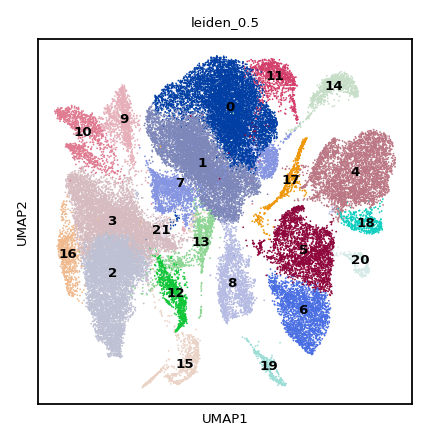

In [193]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['leiden_0.5'], legend_loc="on data")

In [238]:
heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"] = heart_infection_sc_no_viral_genes.obs["leiden_0.5"]
celltypes = {'0': "Inflamed endothelial cells", 
             '1': "Endothelial cells", 
             '2': "Fibroblasts", 
             "3": "Fibroblasts",
             '4': "T-cells",
             '5': "Dendritic cells",
             '6': "Macrophages", 
             '8': "Endocardial cells",
             '7': "Mesenchymal endothelial cells",
             '12': "Inflamed endothelial cells",
             '11': "Cxcl9-high inflamed\n endothelial cells",
             '10': "Smooth muscle cells",
             '13': "Erythroblasts",
             '9': "Pericytes",
             '12': "Fibroblasts",
             '14': "B-cells",
             '15': "Cardiomyocytes",
             '16': "Fibroblasts",
             '17': "Pericardial cells",
             '18': "NK cells",
             '19': "Oligodendrocytes",
             '20': "Neutrophils",
             '21': "Fibroblasts"}
heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"] = heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"].map(celltypes).astype("category")

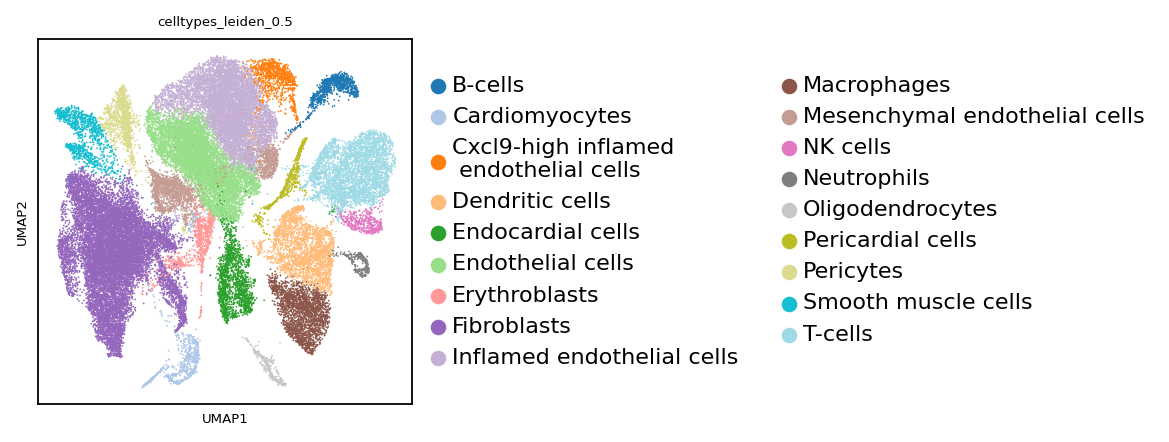

In [240]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['celltypes_leiden_0.5'], palette="tab20", legend_fontsize=10)

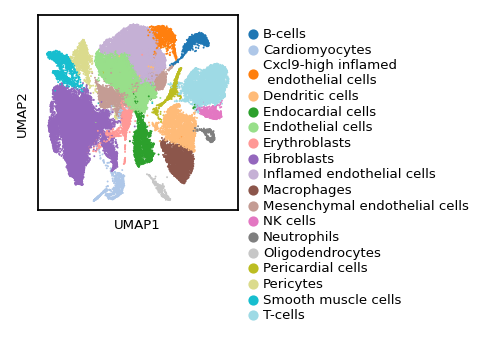

In [262]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, vector_friendly= False, figsize=(2.5, 2.5), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.6, 1.6))
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['celltypes_leiden_0.5'], size=3, palette="tab20", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umapallsamples_celltypes_05.pdf")

In [231]:
heart_infection_sc_no_viral_genes.obs["celltype_groups"] = heart_infection_sc_no_viral_genes.obs["leiden_0.5"]
celltype_groups = {'0': "Endothelial cells", 
             '1': "Endothelial cells", 
             '2': "Fibroblasts", 
             "3": "Fibroblasts",
             '4': "T-cells",
             '5': "Dendritic cells",
             '6': "Macrophages", 
             '8': "Endocardial cells",
             '7': "Endothelial cells",
             '12': "Endothelial cells",
             '11': "Endothelial cells",
             '10': "Mural cells",
             '13': "Erythroblasts",
             '9': "Mural cells",
             '12': "Fibroblasts",
             '14': "B-cells",
             '15': "Cardiomyocytes",
             '16': "Fibroblasts",
             '17': "Pericardial cells",
             '18': "NK cells",
             '19': "Oligodendrocytes",
             '20': "Neutrophils",
             '21': "Fibroblasts"}
heart_infection_sc_no_viral_genes.obs["celltype_groups"] = heart_infection_sc_no_viral_genes.obs["celltype_groups"].map(celltype_groups).astype("category")

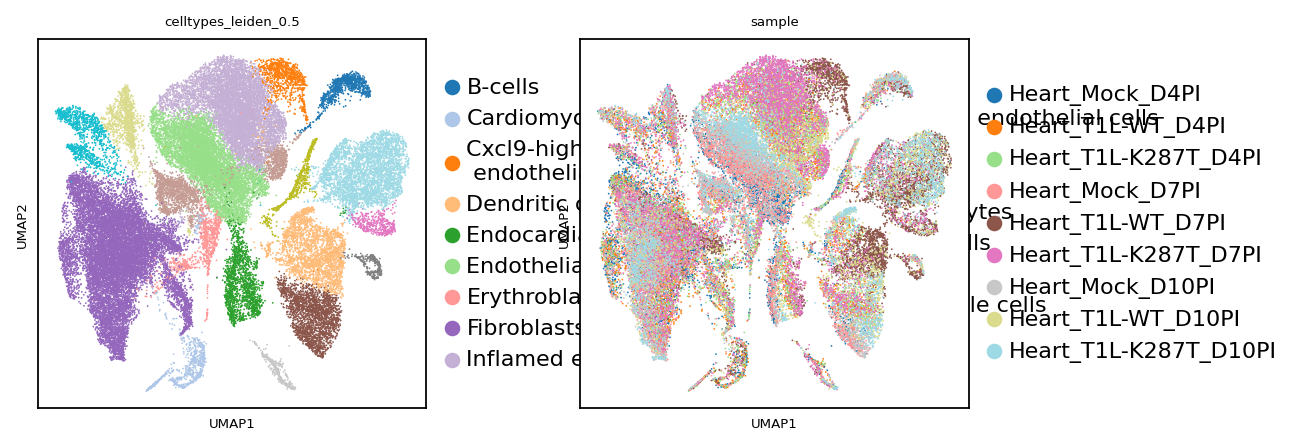

In [122]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['celltypes_leiden_0.5', "sample"], palette="tab20", legend_fontsize=10)

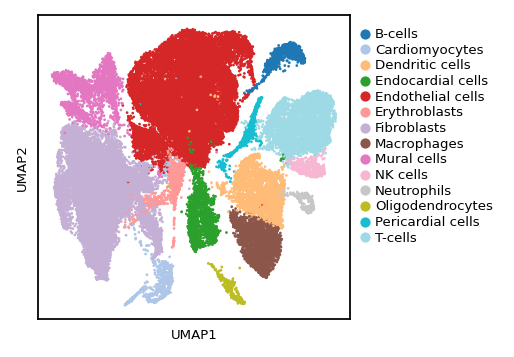

In [232]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (2.5, 2.5))
sc.pl.umap(heart_infection_sc_no_viral_genes, color = ['celltype_groups'], size=6, palette="tab20", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umapallsamples_celltypegroups.pdf")

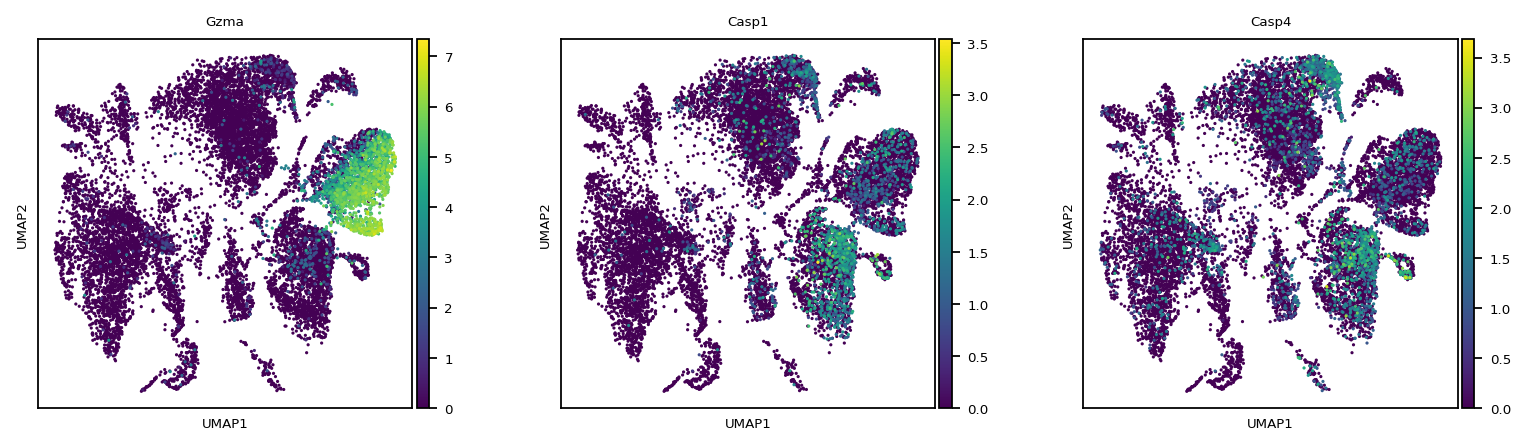

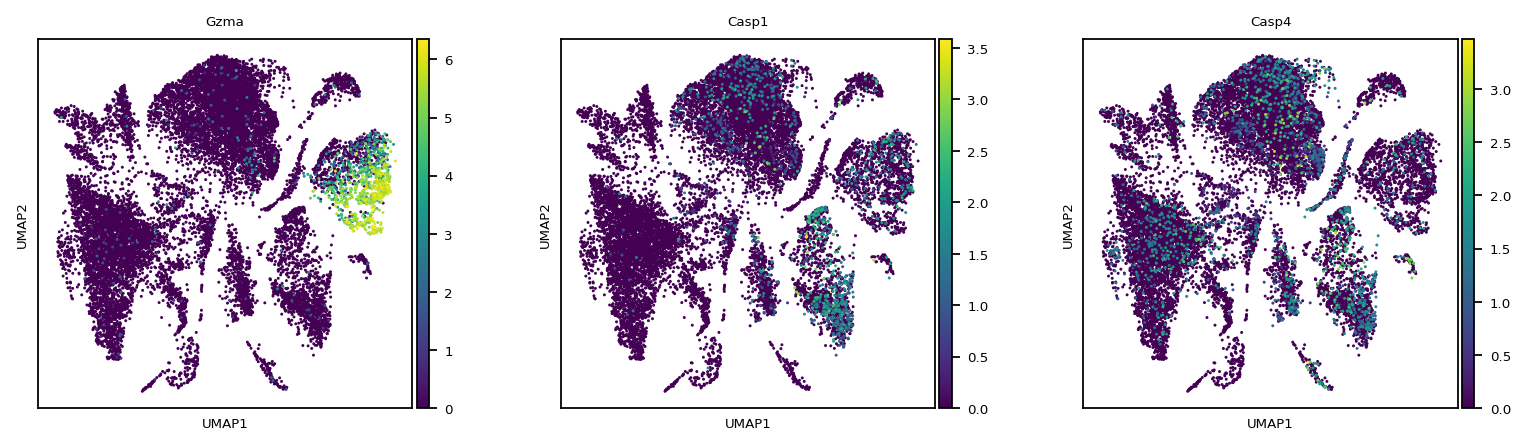

None None


In [348]:
print(sc.pl.umap(heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["state"] == "T1L-WT",], color = ['Gzma', "Casp1", "Casp4"], legend_fontsize=6), 
      sc.pl.umap(heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["state"] == "T1L-K287T",], color = ['Gzma', "Casp1", "Casp4"], legend_fontsize=6))

In [204]:
heart_infection_sc_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")

In [119]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")

In [205]:
heart_infection_sc_no_viral_genes

AnnData object with n_obs × n_vars = 48455 × 2196
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'umap_density_condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'leiden_0.6', 'leiden_0.5', 'leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'condition_colors', 'neighbors', 'umap', 'umap_density_condition_params', 'log1p', 'hvg', 'pca', 'phase_colors', 'leiden', 'sample_colors', 'leiden_0.6_colors', 'leiden_0.5_colors', 'rank_genes_groups_leiden_0.5', 'dendrogram_leiden_0.5', 'celltypes_leiden_0.5_colors', 'celltype_group

In [207]:
sc.tl.rank_genes_groups(heart_infection_sc_no_viral_genes, 'celltype_groups', method='wilcoxon', key_added='rank_genes_groups_celltype_groups')

ranking genes
    finished: added to `.uns['rank_genes_groups_celltype_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:59)


In [208]:
DGE_celltype_groups = pd.DataFrame(heart_infection_sc_no_viral_genes.uns['rank_genes_groups_celltype_groups']['names']).head(100)
DGE_celltype_groups.to_csv("DGE_all_samples_celltype_groups.csv")

In [214]:
sc.tl.rank_genes_groups(heart_infection_sc_no_viral_genes, groupby= "condition", groups = ["T1L-WT_D4PI"], reference="T1L-K287T_D4PI", key_added='rank_genes_T1L-WT_vs_T1L-K287T', method="wilcoxon")
WT_K287T_markers = sc.get.rank_genes_groups_df(heart_infection_sc_no_viral_genes, group= ["T1L-WT_D4PI"], key= "rank_genes_T1L-WT_vs_T1L-K287T")
# WT_K287T_markers.to_csv("WT_K287T_markers.csv")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_T1L-K287T']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:22)


In [220]:
sc.tl.rank_genes_groups(heart_infection_sc_no_viral_genes, groupby= "condition", groups = ["T1L-WT_D4PI"], reference="Mock_D4PI", key_added='rank_genes_T1L-WT_vs_Mock', method="wilcoxon")
WT_mock_markers = sc.get.rank_genes_groups_df(heart_infection_sc_no_viral_genes, group= ["T1L-WT_D4PI"], key= "rank_genes_T1L-WT_vs_Mock")
# WT_mock_markers.to_csv("WT_mock_markers.csv")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:27)


In [221]:
sc.tl.rank_genes_groups(heart_infection_sc_no_viral_genes, groupby= "condition", groups = ["T1L-K287T_D4PI"], reference="Mock_D4PI", key_added='rank_genes_T1L-K287T_vs_Mock', method="wilcoxon")
K287T_mock_markers = sc.get.rank_genes_groups_df(heart_infection_sc_no_viral_genes, group= ["T1L-K287T_D4PI"], key= "rank_genes_T1L-K287T_vs_Mock")
# K287T_mock_markers.to_csv("K287T_mock_markers.csv")

ranking genes
    finished: added to `.uns['rank_genes_T1L-K287T_vs_Mock']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:24)


In [227]:
print(K287T_mock_markers.head(20))

       names     scores  logfoldchanges  pvals  pvals_adj
0       Bst2  82.846642        5.131853    0.0        0.0
1     Ifitm3  81.442963        3.516547    0.0        0.0
2      Isg15  80.108307        7.166270    0.0        0.0
3        B2m  75.100052        3.515925    0.0        0.0
4       Irf7  61.646984        7.132359    0.0        0.0
5      Iigp1  60.313465        6.976432    0.0        0.0
6       Ly6e  59.896164        2.955384    0.0        0.0
7      H2-K1  59.528580        4.320125    0.0        0.0
8      Ifit3  57.078495        7.794725    0.0        0.0
9      H2-D1  56.975693        3.332346    0.0        0.0
10  Ifi27l2a  52.870453        4.606709    0.0        0.0
11     Ifit1  51.339340        7.713621    0.0        0.0
12      Gbp7  50.173386        3.932807    0.0        0.0
13     Psmb8  50.136757        4.002011    0.0        0.0
14    Rnf213  48.093483        3.923946    0.0        0.0
15      Ly6a  47.860176        3.587558    0.0        0.0
16  Lgals3bp  

In [228]:
WT_mock_markers_significant = WT_mock_markers[(WT_mock_markers["logfoldchanges"] > 1.0) & (WT_mock_markers["logfoldchanges"] < 10.0)]
WT_mock_markers_significant = WT_mock_markers_significant[WT_mock_markers_significant["pvals_adj"] < 0.01]
WT_mock_markers_significant.shape

(228, 5)

In [229]:
K287T_mock_markers_significant = K287T_mock_markers[(K287T_mock_markers["logfoldchanges"] > 1.0) & (K287T_mock_markers["logfoldchanges"] < 10.0)]
K287T_mock_markers_significant = K287T_mock_markers_significant[K287T_mock_markers_significant["pvals_adj"] < 0.01]
K287T_mock_markers_significant.shape

(230, 5)

In [234]:
common_markers = list(set(WT_mock_markers_significant["names"]).intersection(K287T_mock_markers_significant["names"]))
len(common_markers)

191

In [319]:
heart_infection_sc_no_viral_genes.obs["condition"].value_counts()

T1L-K287T_D7PI     7462
Mock_D7PI          7096
Mock_D4PI          6596
T1L-WT_D4PI        5970
T1L-K287T_D4PI     5354
T1L-WT_D7PI        5086
T1L-K287T_D10PI    3955
Mock_D10PI         3483
T1L-WT_D10PI       3453
Name: condition, dtype: int64

In [18]:
heart_infection_sc_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")

In [310]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes.h5ad")

In [311]:
# Mock_Heart_D4PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D7PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
# Mock_Heart_D10PI_xGen = sc.read_10x_h5('./../ReoT1L_xGen/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5')

T1L_K287T_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/filtered_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/filtered_feature_bc_matrix.h5')

# Mock_Heart_D4PI_xGen.var_names_make_unique()
T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
# Mock_Heart_D7PI_xGen.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
# Mock_Heart_D10PI_xGen.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()

T1L_K287T_Heart_D4PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D7PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D10PI_xGen3.var_names_make_unique()

samples_xGen3 = ["Heart_T1L-WT_D4PI", "Heart_T1L-K287T_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-K287T_D7PI", "Heart_T1L-WT_D10PI", "Heart_T1L-K287T_D10PI"]

heart_infection_sc_xGen3_subset = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_K287T_Heart_D4PI_xGen3, 
                                                    T1L_WT_Heart_D7PI_xGen3,
                                                    T1L_K287T_Heart_D7PI_xGen3, 
                                                    T1L_WT_Heart_D10PI_xGen3,
                                                    T1L_K287T_Heart_D10PI_xGen3,
                                                    batch_key= "sample", batch_categories=samples_xGen3,
                                                    index_unique="-")

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen//outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [312]:
reoviral_genes = [name for name in heart_infection_sc_xGen3_subset.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_xGen3_subset[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
# reoviral_genes_indicator = np.in1d(heart_infection_sc_xGen2_subset.var_names, reoviral_genes)
# heart_infection_sc_xGen2_no_viral_genes = heart_infection_sc_xGen2_subset[:, ~reoviral_genes_indicator]
# heart_infection_sc_xGen2_viral_genes_only = heart_infection_sc_xGen2_subset[:, reoviral_genes_indicator]

viral_expression.columns = [name + "_xGen" for name in viral_expression.columns]

print(heart_infection_sc_no_viral_genes.obs.shape)
heart_infection_sc_no_viral_genes.obs = heart_infection_sc_no_viral_genes.obs.join(viral_expression)
print(heart_infection_sc_no_viral_genes.obs.shape)
heart_infection_sc_no_viral_genes.obs['total_viral_xGen'] = viral_expression.sum(axis=1).astype(int)
heart_infection_sc_no_viral_genes.obs['pct_viral_xGen'] = ((heart_infection_sc_no_viral_genes.obs['total_viral_xGen']) / (heart_infection_sc_no_viral_genes.obs['total_viral_xGen'] + heart_infection_sc_no_viral_genes.obs['total_counts'])) * 100

heart_infection_sc_no_viral_genes.obs['total_viral_NA'] = heart_infection_sc_no_viral_genes.obs['total_viral']
heart_infection_sc_no_viral_genes.obs['total_viral_xGen_NA'] = heart_infection_sc_no_viral_genes.obs['total_viral_xGen']
heart_infection_sc_no_viral_genes.obs['total_viral_NA'][heart_infection_sc_no_viral_genes.obs['total_viral_NA']==0] = np.nan
heart_infection_sc_no_viral_genes.obs['total_viral_xGen_NA'][heart_infection_sc_no_viral_genes.obs['total_viral_xGen_NA']==0] = np.nan

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(48455, 31)
(48455, 41)


<ipython-input-312-b4a1f2660d3a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-312-b4a1f2660d3a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [313]:
heart_infection_sc_no_viral_genes.obs["total_viral_xGen_thresh2"] = heart_infection_sc_no_viral_genes.obs["total_viral_xGen_NA"]
heart_infection_sc_no_viral_genes.obs["total_viral_xGen_thresh2"][(heart_infection_sc_no_viral_genes.obs["total_viral_xGen_thresh2"] < 2)] = np.NaN
heart_infection_sc_no_viral_genes.obs['pct_viral_xGen_thresh2'] = ((heart_infection_sc_no_viral_genes.obs['total_viral_xGen_thresh2']) / (heart_infection_sc_no_viral_genes.obs['total_viral_xGen_thresh2'] + heart_infection_sc_no_viral_genes.obs['total_counts'])) * 100

<ipython-input-313-df823e6dacbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


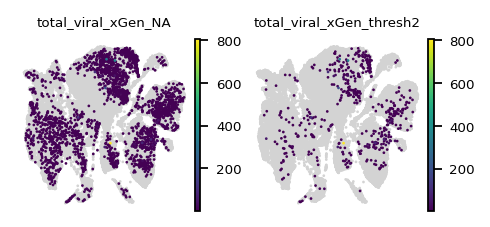

In [302]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1.4,1.4), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc_no_viral_genes, color=["total_viral_xGen_NA",  "total_viral_xGen_thresh2"], size = 6, ncols=2, palette='viridis_r', add_outline=False, frameon=False, wspace=0.2, return_fig=False, save="viral_trop_umap_allsamples_xgen_filtered.pdf")

In [332]:
heart_infection_sc_no_viral_genes.obs["viral_exp"] = heart_infection_sc_no_viral_genes.obs["total_viral_xGen_thresh2"]
mean_viral_exp = heart_infection_sc_no_viral_genes.obs[["condition", "celltype_groups", "viral_exp"]].groupby(["condition", "celltype_groups"]).mean()["viral_exp"]
celltype_counts = heart_infection_sc_no_viral_genes.obs.value_counts(subset=["condition", "celltype_groups"])
infected_cells_only = heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["viral_exp"] >= 0, :]
infected_cells_only
infected_cells_only.obs["condition"] = infected_cells_only.obs["condition"].cat.set_categories(heart_infection_sc_no_viral_genes.obs["condition"].cat.categories)
infected_cells_only.obs["celltype_groups"] = infected_cells_only.obs["celltype_groups"].cat.set_categories(heart_infection_sc_no_viral_genes.obs["celltype_groups"].cat.categories)
infected_celltypes_counts = infected_cells_only.obs.value_counts(subset=["condition", "celltype_groups"])
count_data = pd.DataFrame({'mean_viral_exp': mean_viral_exp, 'total_counts': celltype_counts, 'infected_counts': infected_celltypes_counts})
count_data["pct_cells"] = round((count_data["infected_counts"]/count_data["total_counts"]) * 100)
count_data = count_data.iloc[count_data.index.get_level_values('condition').isin(["T1L-WT_D4PI", "T1L-K287T_D4PI", "T1L-WT_D7PI", "T1L-K287T_D7PI", "T1L-WT_D10PI", "T1L-K287T_D10PI"])]
celltype_counts = count_data.unstack("celltype_groups")
celltype_counts = celltype_counts.reindex(["T1L-WT_D4PI", "T1L-K287T_D4PI", "T1L-WT_D7PI", "T1L-K287T_D7PI", "T1L-WT_D10PI", "T1L-K287T_D10PI"])
celltype_counts

Trying to set attribute `.obs` of view, copying.


mean_viral_exp                                 \
celltype_groups        B-cells Cardiomyocytes Dendritic cells   
condition                                                       
T1L-WT_D4PI                NaN       7.000000        2.333333   
T1L-K287T_D4PI             NaN       5.333333       45.000000   
T1L-WT_D7PI                2.0       2.000000        8.673077   
T1L-K287T_D7PI             NaN            NaN       13.000000   
T1L-WT_D10PI               NaN            NaN       20.000000   
T1L-K287T_D10PI            NaN            NaN             NaN   

                                                                               \
celltype_groups Endocardial cells Endothelial cells Erythroblasts Fibroblasts   
condition                                                                       
T1L-WT_D4PI                  83.1          6.579545           2.0    3.166667   
T1L-K287T_D4PI               19.0         24.209302           9.0    4.809524   
T1L-WT_D7PI                   6.3          2.447761           NaN    2.230769   
T1L-K287T_D7PI                NaN         11.000000           NaN    3.000000   
T1L-WT_D10PI                  NaN               NaN           NaN         NaN   
T1L-K287T_D10PI               NaN               NaN           NaN         NaN   

                                                  ...     pct_cells  \
celltype_groups Macrophages NK cells Neutrophils  ... Erythroblasts   
condition                                         ...                 
T1L-WT_D4PI        4.454545      NaN         NaN  ...           1.0   
T1L-K287T_D4PI     2.000000      NaN         NaN  ...           2.0   
T1L-WT_D7PI        3.000000      2.0   11.857143  ...           NaN   
T1L-K287T_D7PI          NaN      NaN         NaN  ...           NaN   
T1L-WT_D10PI            NaN      NaN         NaN  ...           NaN   
T1L-K287T_D10PI         NaN      NaN         NaN  ...           NaN   

                                                                               \
celltype_groups Fibroblasts Macrophages NK cells Neutrophils Oligodendrocytes   
condition                                                                       
T1L-WT_D4PI             1.0         3.0      NaN         NaN              NaN   
T1L-K287T_D4PI          1.0         2.0      NaN         NaN              2.0   
T1L-WT_D7PI             2.0         4.0      3.0         5.0              NaN   
T1L-K287T_D7PI          0.0         NaN      NaN         NaN              NaN   
T1L-WT_D10PI            NaN         NaN      NaN         NaN              NaN   
T1L-K287T_D10PI         NaN         NaN      NaN         NaN              NaN   

                                                                         
celltype_groups Pericardial cells Pericytes Smooth muscle cells T-cells  
condition                                                                
T1L-WT_D4PI                   NaN       2.0                 1.0     1.0  
T1L-K287T_D4PI                2.0       NaN                 NaN     NaN  
T1L-WT_D7PI                   6.0       7.0                 2.0     4.0  
T1L-K287T_D7PI                NaN       NaN                 NaN     NaN  
T1L-WT_D10PI                  NaN       NaN                 NaN     0.0  
T1L-K287T_D10PI               NaN       NaN                 NaN     NaN  

[6 rows x 60 columns]

In [338]:
heart_infection_sc_no_viral_genes.obs["viral_exp"] = heart_infection_sc_no_viral_genes.obs["viral_exp"].fillna(0)

AAACCCACACTAGGCC-1-Heart_Mock_D4PI          0.0
AAACCCACACTTTAGG-1-Heart_Mock_D4PI          0.0
AAACCCAGTGTCTTCC-1-Heart_Mock_D4PI          0.0
AAACCCAGTGTTACAC-1-Heart_Mock_D4PI          0.0
AAACCCAGTTACCTTT-1-Heart_Mock_D4PI          0.0
                                           ... 
TTTGGTTTCGACGCGT-1-Heart_T1L-K287T_D10PI    0.0
TTTGTTGAGCTCGGCT-1-Heart_T1L-K287T_D10PI    0.0
TTTGTTGAGGATACCG-1-Heart_T1L-K287T_D10PI    0.0
TTTGTTGCACTTCAAG-1-Heart_T1L-K287T_D10PI    0.0
TTTGTTGGTGCTCTTC-1-Heart_T1L-K287T_D10PI    0.0
Name: viral_exp, Length: 48455, dtype: float64

                 mean_viral_exp        condition
condition                                       
Mock_D4PI              0.000000        Mock_D4PI
T1L-WT_D4PI            0.268509      T1L-WT_D4PI
T1L-K287T_D4PI         0.256631   T1L-K287T_D4PI
Mock_D7PI              0.000000        Mock_D7PI
T1L-WT_D7PI            0.219622      T1L-WT_D7PI
T1L-K287T_D7PI         0.003618   T1L-K287T_D7PI
Mock_D10PI             0.000000       Mock_D10PI
T1L-WT_D10PI           0.012163     T1L-WT_D10PI
T1L-K287T_D10PI        0.000000  T1L-K287T_D10PI
condition
Mock_D4PI             0.0
T1L-WT_D4PI        1603.0
T1L-K287T_D4PI     1374.0
Mock_D7PI             0.0
T1L-WT_D7PI        1117.0
T1L-K287T_D7PI       27.0
Mock_D10PI            0.0
T1L-WT_D10PI         42.0
T1L-K287T_D10PI       0.0
Name: viral_exp, dtype: float64


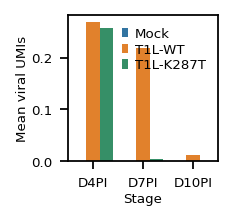

In [345]:
heart_infection_sc_no_viral_genes.obs["viral_exp"] = heart_infection_sc_no_viral_genes.obs["total_viral_xGen_thresh2"]
heart_infection_sc_no_viral_genes.obs["viral_exp"] = heart_infection_sc_no_viral_genes.obs["viral_exp"].fillna(0)
mean_viral_exp = heart_infection_sc_no_viral_genes.obs[["condition", "viral_exp"]].groupby(["condition"]).mean()["viral_exp"].to_frame(name = "mean_viral_exp")
mean_viral_exp["condition"] = mean_viral_exp.index
print(mean_viral_exp)
total_viral_exp = heart_infection_sc_no_viral_genes.obs[["condition", "viral_exp"]].groupby(["condition"]).sum()["viral_exp"]
print(total_viral_exp)
mean_viral_exp["stage"] = [x.split("_")[1] for x in mean_viral_exp["condition"]]
mean_viral_exp["state"] = [x.split("_")[0] for x in mean_viral_exp["condition"]]
mean_viral_exp["stage"] = mean_viral_exp["stage"].astype("category")
mean_viral_exp["state"] = mean_viral_exp["state"].astype("category")
mean_viral_exp["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
mean_viral_exp["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT", "T1L-K287T"], inplace = True)
fig, ax = plt.subplots(figsize=(1.2, 1.2))
ax.set_axisbelow(True)
plt.grid(None)
sns.barplot(data = mean_viral_exp, y= "mean_viral_exp", x = "stage", hue = "state")
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center')
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2)
plt.xlabel("Stage", labelpad = 1)
plt.ylabel("Mean viral UMIs", labelpad=1)
# from statannotations.Annotator import Annotator
# pairs=[(("D4PI","T1L-WT"), ("D4PI", "T1L-K287T")), (("D7PI","T1L-WT"), ("D7PI", "T1L-K287T")), (("D10PI","T1L-WT"), ("D10PI", "T1L-K287T"))]
# annotator = Annotator(ax, pairs, data=mean_viral_exp, x="stage", y=mean_viral_exp, hue = "state")
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
# annotator.apply_and_annotate()
plt.savefig("./figures/mean_viral_load_allsamples.pdf")

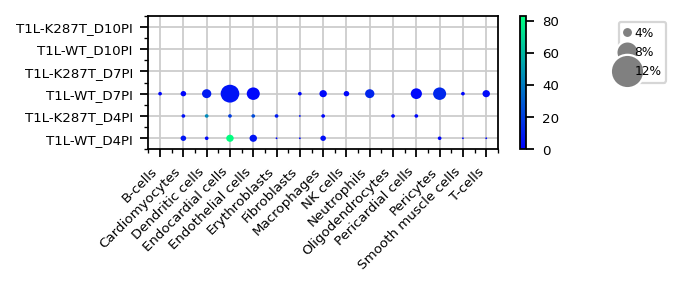

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
plt.rcParams['axes.axisbelow'] = True

N = celltype_counts["pct_cells"].shape[0]
M = celltype_counts["pct_cells"].shape[1]
ylabels = celltype_counts["pct_cells"].index
xlabels = celltype_counts["pct_cells"].columns

x, y = np.meshgrid(np.arange(M), np.arange(N))
s = celltype_counts["pct_cells"].fillna(0).to_numpy()
c = celltype_counts["mean_viral_exp"].fillna(0).to_numpy()
# print(c.flatten())
# print(s.flatten())

fig, ax = plt.subplots(figsize=(3.5,1.1))

R = (s/100.0)*4
circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
col = PatchCollection(circles, array=c.flatten(), cmap="winter")
col.set_clim([0, np.max(c)])

ax.add_collection(col)
ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.colorbar(col)

from matplotlib.lines import Line2D
line1 = Line2D(range(1), range(1), color="white", marker='o', markersize=5, markerfacecolor="grey")
line2 = Line2D(range(1), range(1), color="white", marker='o', markersize=10, markerfacecolor="grey")
line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=15, markerfacecolor="grey")
# line3 = Line2D(range(1), range(1), color="white", marker='o', markersize=, markerfacecolor="grey")
plt.legend((line1,line2,line3),('4%','8%', "12%"),numpoints=1, bbox_to_anchor = (1.5,1.0))

# import matplotlib.patches as mpatches
# from matplotlib.legend_handler import HandlerPatch
# class HandlerEllipse(HandlerPatch):
#     def create_artists(self, legend, orig_handle,
#                        xdescent, ydescent, width, height, fontsize, trans):
#         center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
#         p = mpatches.Ellipse(xy=center, width=width + xdescent,
#                              height=height + ydescent)
#         self.update_prop(p, orig_handle, legend)
#         p.set_transform(trans)
#         return [p]    
# c1 = mpatches.Circle((1.0,1.0), radius=0.25, facecolor="grey", edgecolor="black", linewidth=0)
# c2 = mpatches.Circle((1.0,1.0), radius=2.0, facecolor="grey", edgecolor="black", linewidth=0)
# plt.legend([c1, c2], ["25%", "50%"], handler_map={mpatches.Circle:HandlerEllipse()})

# plt.show()
# plt.tight_layout()
# plt.show()
plt.savefig("figures/viral_exp_allsamples_dotplot.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)

In [20]:
np.max(s)

10.0

In [237]:
heart_infection_sc_no_viral_genes.write_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes1.h5ad")

In [91]:
heart_infection_sc_no_viral_genes = sc.read_h5ad(filename="./../pyobjs/heart_infection_sc_no_viral_genes1.h5ad")

In [84]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D4PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D4PI/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D7PI/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_sc = sc.read_10x_h5('./../scData/Heart_K287T_D10PI/outs/raw_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()
T1L_K287T_Heart_D4PI_sc.var_names_make_unique()
T1L_K287T_Heart_D7PI_sc.var_names_make_unique()
T1L_K287T_Heart_D10PI_sc.var_names_make_unique()

reading ./../scData/Heart_Mock_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_Mock_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_T1L_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D4PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D7PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/Heart_K287T_D10PI/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [85]:
samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_T1L-K287T_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_T1L-K287T_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI", "Heart_T1L-K287T_D10PI"]


In [88]:
heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D7PI_sc, T1L_K287T_Heart_D4PI_sc, 
                                                    Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
                                                    T1L_K287T_Heart_D7PI_sc, Mock_Heart_D10PI_sc, 
                                                    T1L_WT_Heart_D10PI_sc, T1L_K287T_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=samples,
                                                    index_unique="-")

heart_infection_sc.obs_names_make_unique()
heart_infection_sc.var_names_make_unique()
print(heart_infection_sc.shape)

(9203104, 54848)


In [89]:
reoviral_genes = [name for name in heart_infection_sc.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc.var_names, reoviral_genes)
heart_infection_sc_no_viral_genes = heart_infection_sc[:, ~reoviral_genes_indicator]
heart_infection_sc_no_viral_genes.var_names = [name.split("_")[1] for name in heart_infection_sc_no_viral_genes.var_names]
heart_infection_sc_no_viral_genes.obs = heart_infection_sc_no_viral_genes.obs.join(viral_expression.astype(int))
print(heart_infection_sc_no_viral_genes.shape)


['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(9203104, 54838)


In [91]:
temp_dataset_no_viral_genes  = heart_infection_sc_no_viral_genes
temp_dataset_no_viral_genes.var['mt'] = temp_dataset_no_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_no_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [113]:
data = pd.DataFrame({"cell_barcode":temp_dataset_no_viral_genes.obs_names, "total_counts":temp_dataset_no_viral_genes.obs["total_counts"], "sample":temp_dataset_no_viral_genes.obs["sample"]})
data["Gapdh"] = temp_dataset_no_viral_genes[:,"Gapdh"].to_df()
data["Hba-a1"] = temp_dataset_no_viral_genes[:,"Hba-a1"].to_df()
data["cell_in_droplet"] = ["Viable cells" if data.loc[x, "total_counts"] > 200 else "Dead cells" for x in data["cell_barcode"]]
data["cell_in_droplet"] = ["Background" if data.loc[x, "total_counts"] < 1 else data.loc[x, "cell_in_droplet"] for x in data["cell_barcode"]]
data["total_counts"] = data["total_counts"] + 1
data["Gapdh"] = data["Gapdh"] + 1
data["Hba-a1"] = data["Hba-a1"] + 1
print(data.shape)
print(data["cell_in_droplet"].value_counts())

(9203104, 6)
Dead cells      4695520
Background      4428069
Viable cells      79515
Name: cell_in_droplet, dtype: int64


In [114]:
data = data.sort_values(by="total_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

In [115]:
data

cell_barcode  \
CATCCACGTACACGCC-1-Heart_Mock_D10PI            CATCCACGTACACGCC-1-Heart_Mock_D10PI   
GACTCTCTCCGCTGTT-1-Heart_T1L-K287T_D10PI  GACTCTCTCCGCTGTT-1-Heart_T1L-K287T_D10PI   
ACGATCAAGCAATTAG-1-Heart_T1L-WT_D10PI        ACGATCAAGCAATTAG-1-Heart_T1L-WT_D10PI   
TGGAACTCAAGCCTGC-1-Heart_T1L-K287T_D10PI  TGGAACTCAAGCCTGC-1-Heart_T1L-K287T_D10PI   
TTCCTCTTCTCCGAGG-1-Heart_T1L-K287T_D10PI  TTCCTCTTCTCCGAGG-1-Heart_T1L-K287T_D10PI   
...                                                                            ...   
TCGGTCTTCGTCTCAC-1-Heart_T1L-K287T_D4PI    TCGGTCTTCGTCTCAC-1-Heart_T1L-K287T_D4PI   
GTCCACTTCACACCCT-1-Heart_Mock_D10PI            GTCCACTTCACACCCT-1-Heart_Mock_D10PI   
GTCCACTTCACAAGGG-1-Heart_Mock_D10PI            GTCCACTTCACAAGGG-1-Heart_Mock_D10PI   
GTCCACTTCAATCTCT-1-Heart_Mock_D10PI            GTCCACTTCAATCTCT-1-Heart_Mock_D10PI   
TCGGTCTGTGAACTAA-1-Heart_T1L-K287T_D7PI    TCGGTCTGTGAACTAA-1-Heart_T1L-K287T_D7PI   

                                          total_counts                 sample  \
CATCCACGTACACGCC-1-Heart_Mock_D10PI            64899.0       Heart_Mock_D10PI   
GACTCTCTCCGCTGTT-1-Heart_T1L-K287T_D10PI       58115.0  Heart_T1L-K287T_D10PI   
ACGATCAAGCAATTAG-1-Heart_T1L-WT_D10PI          52419.0     Heart_T1L-WT_D10PI   
TGGAACTCAAGCCTGC-1-Heart_T1L-K287T_D10PI       49525.0  Heart_T1L-K287T_D10PI   
TTCCTCTTCTCCGAGG-1-Heart_T1L-K287T_D10PI       48927.0  Heart_T1L-K287T_D10PI   
...                                                ...                    ...   
TCGGTCTTCGTCTCAC-1-Heart_T1L-K287T_D4PI            1.0   Heart_T1L-K287T_D4PI   
GTCCACTTCACACCCT-1-Heart_Mock_D10PI                1.0       Heart_Mock_D10PI   
GTCCACTTCACAAGGG-1-Heart_Mock_D10PI                1.0       Heart_Mock_D10PI   
GTCCACTTCAATCTCT-1-Heart_Mock_D10PI                1.0       Heart_Mock_D10PI   
TCGGTCTGTGAACTAA-1-Heart_T1L-K287T_D7PI            1.0   Heart_T1L-K287T_D7PI   

                                          Gapdh  Hba-a1 cell_in_droplet  \
CATCCACGTACACGCC-1-Heart_Mock_D10PI        15.0     1.0    Viable cells   
GACTCTCTCCGCTGTT-1-Heart_T1L-K287T_D10PI    9.0     7.0    Viable cells   
ACGATCAAGCAATTAG-1-Heart_T1L-WT_D10PI      18.0     1.0    Viable cells   
TGGAACTCAAGCCTGC-1-Heart_T1L-K287T_D10PI    8.0     1.0    Viable cells   
TTCCTCTTCTCCGAGG-1-Heart_T1L-K287T_D10PI    9.0     1.0    Viable cells   
...                                         ...     ...             ...   
TCGGTCTTCGTCTCAC-1-Heart_T1L-K287T_D4PI     1.0     1.0      Background   
GTCCACTTCACACCCT-1-Heart_Mock_D10PI         1.0     1.0      Background   
GTCCACTTCACAAGGG-1-Heart_Mock_D10PI         1.0     1.0      Background   
GTCCACTTCAATCTCT-1-Heart_Mock_D10PI         1.0     1.0      Background   
TCGGTCTGTGAACTAA-1-Heart_T1L-K287T_D7PI     1.0     1.0      Background   

                                          cell_number  
CATCCACGTACACGCC-1-Heart_Mock_D10PI          1.000000  
GACTCTCTCCGCTGTT-1-Heart_T1L-K287T_D10PI     1.301030  
ACGATCAAGCAATTAG-1-Heart_T1L-WT_D10PI        1.477121  
TGGAACTCAAGCCTGC-1-Heart_T1L-K287T_D10PI     1.602060  
TTCCTCTTCTCCGAGG-1-Heart_T1L-K287T_D10PI     1.698970  
...                                               ...  
TCGGTCTTCGTCTCAC-1-Heart_T1L-K287T_D4PI      7.963934  
GTCCACTTCACACCCT-1-Heart_Mock_D10PI          7.963934  
GTCCACTTCACAAGGG-1-Heart_Mock_D10PI          7.963934  
GTCCACTTCAATCTCT-1-Heart_Mock_D10PI          7.963934  
TCGGTCTGTGAACTAA-1-Heart_T1L-K287T_D7PI      7.963934  

[9203104 rows x 7 columns]

In [ ]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(False)
plt.xlabel("Droplets")
plt.ylabel("UMI counts")
sns.scatterplot(data = data, x = "cell_number", y = "total_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(yscale = "log", xscale = "log")
ax.axes.xaxis.set_visible(False)
# ax.axes.xaxis.set_ticks([])
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.show()
# plt.savefig("./figures/knee_totalUMI.pdf")

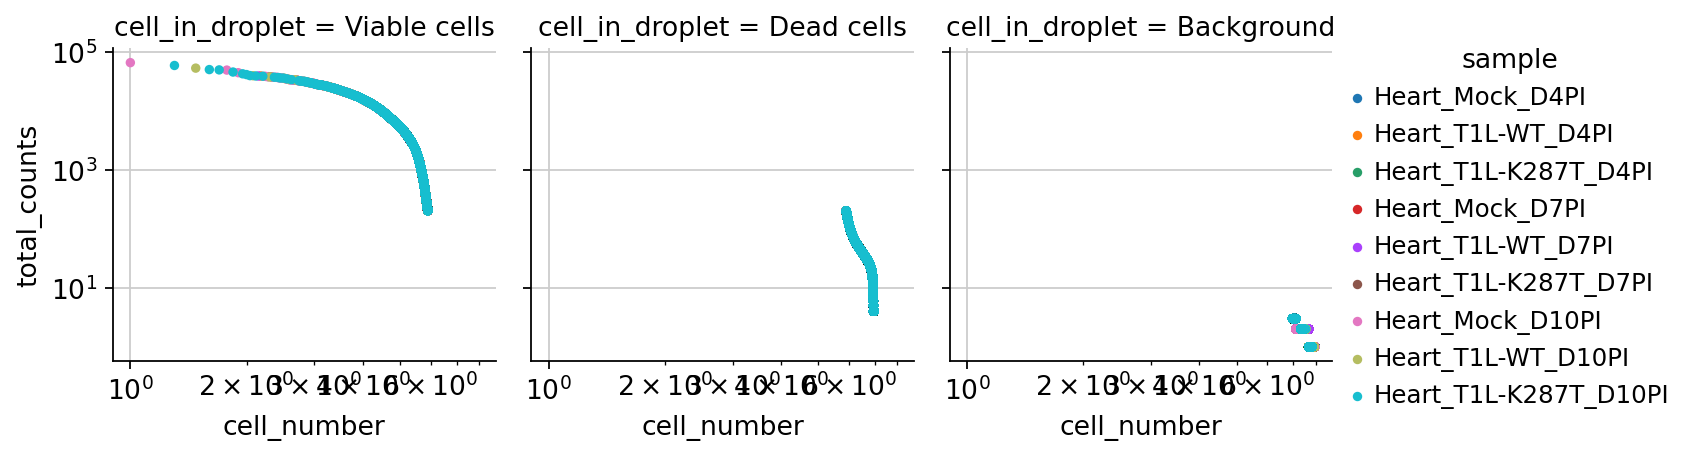

In [96]:
# data = data.sort_values(by="total_viral_counts", ascending=False)
# data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
# data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
g = sns.FacetGrid(data, col="cell_in_droplet", hue="sample")
g.map(sns.scatterplot, "cell_number", "total_counts", linewidth = 0, size = 1.0, rasterized=True).set(yscale = "log", xscale = "log")
g.add_legend()

In [116]:
data_empty = data[data["cell_in_droplet"].isin(["Background"])]

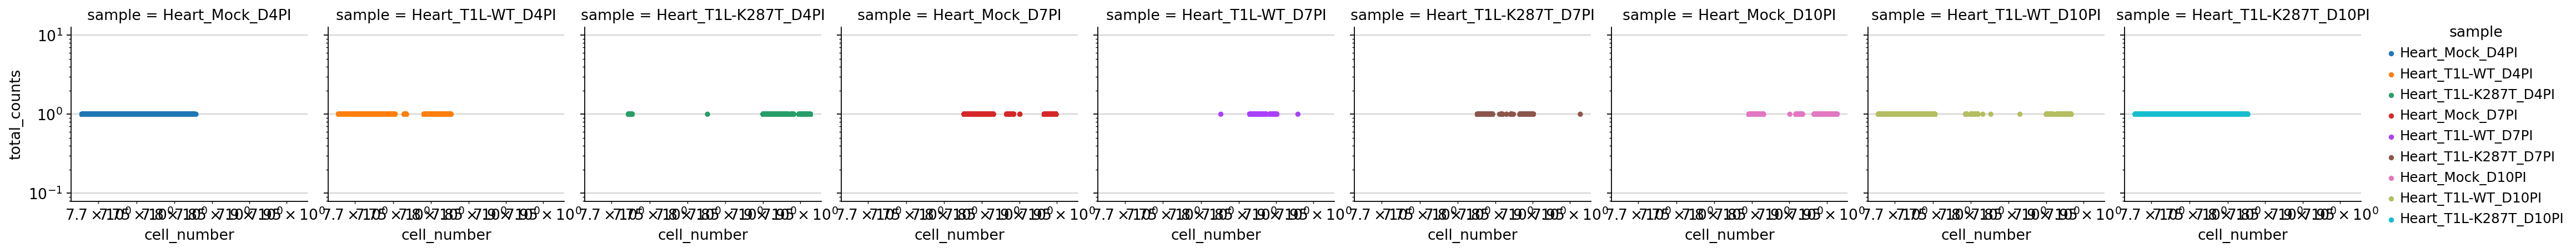

In [117]:
# data = data.sort_values(by="total_viral_counts", ascending=False)
# data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
# data["cell_number"] = np.log10(data["cell_number"] + 1) + 1

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
g = sns.FacetGrid(data_empty, col="sample", hue="sample")
g.map(sns.scatterplot, "cell_number", "total_counts", linewidth = 0, size = 1.0, rasterized=True).set(yscale = "log", xscale = "log")
g.add_legend()

In [127]:
T1L_WT_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_T1L_D10PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D4PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D7PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/raw_feature_bc_matrix.h5')
T1L_K287T_Heart_D10PI_xGen3 = sc.read_10x_h5('./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/raw_feature_bc_matrix.h5')

T1L_WT_Heart_D4PI_xGen3.var_names_make_unique()
T1L_WT_Heart_D7PI_xGen3.var_names_make_unique()
T1L_WT_Heart_D10PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D4PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D7PI_xGen3.var_names_make_unique()
T1L_K287T_Heart_D10PI_xGen3.var_names_make_unique()

heart_infection_sc_4samples_xGen3 = T1L_WT_Heart_D4PI_xGen3.concatenate(T1L_WT_Heart_D7PI_xGen3, T1L_WT_Heart_D10PI_xGen3,
                                                    T1L_K287T_Heart_D4PI_xGen3, T1L_K287T_Heart_D7PI_xGen3,
                                                     T1L_K287T_Heart_D10PI_xGen3,   
                                                    batch_key= "sample", batch_categories=["Heart_T1L-WT_D4PI", "Heart_T1L-WT_D7PI", "Heart_T1L-WT_D10PI",  "Heart_T1L-K287T_D4PI", "Heart_T1L-K287T_D7PI", "Heart_T1L-K287T_D10PI"],
                                                    index_unique="-")
heart_infection_sc_4samples_xGen3.obs_names_make_unique()
heart_infection_sc_4samples_xGen3.var_names_make_unique()
print(heart_infection_sc_4samples_xGen3.shape)

reading ./../scData/sc_xGen22/Heart_T1L_D4PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D7PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_T1L_D10PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D4PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D7PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../scData/sc_xGen22/Heart_K287T_D10PI_xGen/outs/raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


(150313, 54848)


In [128]:
reoviral_genes = [name for name in heart_infection_sc_4samples_xGen3.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc_4samples_xGen3[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc_4samples_xGen3.var_names, reoviral_genes)
heart_infection_sc_4samples_xGen3 = heart_infection_sc_4samples_xGen3[:, reoviral_genes_indicator]
heart_infection_sc_4samples_xGen3.var_names = [name.split("_")[1] for name in heart_infection_sc_4samples_xGen3.var_names]
heart_infection_sc_4samples_xGen3.obs = heart_infection_sc_4samples_xGen3.obs.join(viral_expression.astype(int))
print(heart_infection_sc_4samples_xGen3.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']
(150313, 10)


In [129]:
temp_dataset_viral_genes  = heart_infection_sc_4samples_xGen3
temp_dataset_viral_genes.var['mt'] = temp_dataset_viral_genes.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(temp_dataset_viral_genes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [130]:
viral_data = pd.DataFrame({"cell_barcode":temp_dataset_viral_genes.obs_names, "sample":temp_dataset_viral_genes.obs["sample"], "total_viral_counts":temp_dataset_viral_genes.obs["total_counts"]})
viral_data = viral_data.sort_values(by="total_viral_counts", ascending=False)
viral_data["cell_number"] = [i+1 for i in range(viral_data.shape[0])]
viral_data["cell_number"] = np.log10(viral_data["cell_number"]+1) + 1

# viral_data = viral_data[viral_data["cell_barcode"].isin(data["cell_barcode"])]
print(viral_data.shape)

# viral_data["cell_in_droplet"] = [data.loc[x,"cell_in_droplet"] for x in viral_data.index]
# viral_data["total_counts"] = [data.loc[x,"total_counts"] for x in viral_data.index]
# viral_data["Gapdh"] = [data.loc[x,"Gapdh"] for x in viral_data.index]

# print(viral_data["cell_in_droplet"].value_counts())

data["total_viral_counts"] = [viral_data.loc[x, "total_viral_counts"] if x in viral_data.index else 0 for x in data.index]
data["total_viral_counts"] = data["total_viral_counts"] + 1

(150313, 4)


In [131]:
data = data.sort_values(by="total_viral_counts", ascending=False)
data["cell_number"] = [i for i in range(temp_dataset_no_viral_genes.shape[0])]
data["cell_number"] = np.log10(data["cell_number"] + 1) + 1



In [ ]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=6, frameon=True, figsize=(3, 3), transparent=False, format="pdf")
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.rc('font', size=6)
plt.grid(False)
plt.xlabel("Viral UMI counts")
plt.xlabel("Droplets")
sns.scatterplot(data = data, x = "cell_number", y = "total_viral_counts", hue = "cell_in_droplet", linewidth = 0, size = 1.0, rasterized=True, ax=ax)
ax.set(yscale = "log", xscale = "log")
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
ax.axes.xaxis.set_visible(False)
ax.axhline(1.25)
# plt.tight_layout()
plt.savefig("./figures/knee_totalviralUMI.pdf")

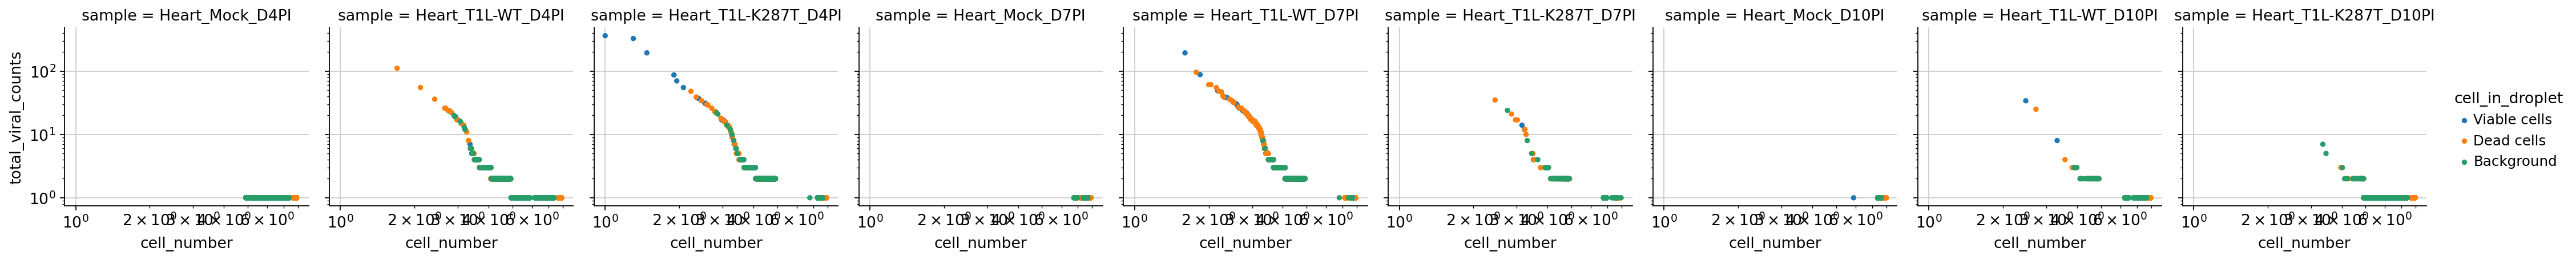

In [132]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, facecolor='white', frameon=True, figsize=(10, 10), transparent=True, format="pdf")
g = sns.FacetGrid(data, col="sample", hue="cell_in_droplet")
g.map(sns.scatterplot, "cell_number", "total_viral_counts", linewidth = 0, size = 1.0).set(yscale = "log", xscale = "log")
g.add_legend()

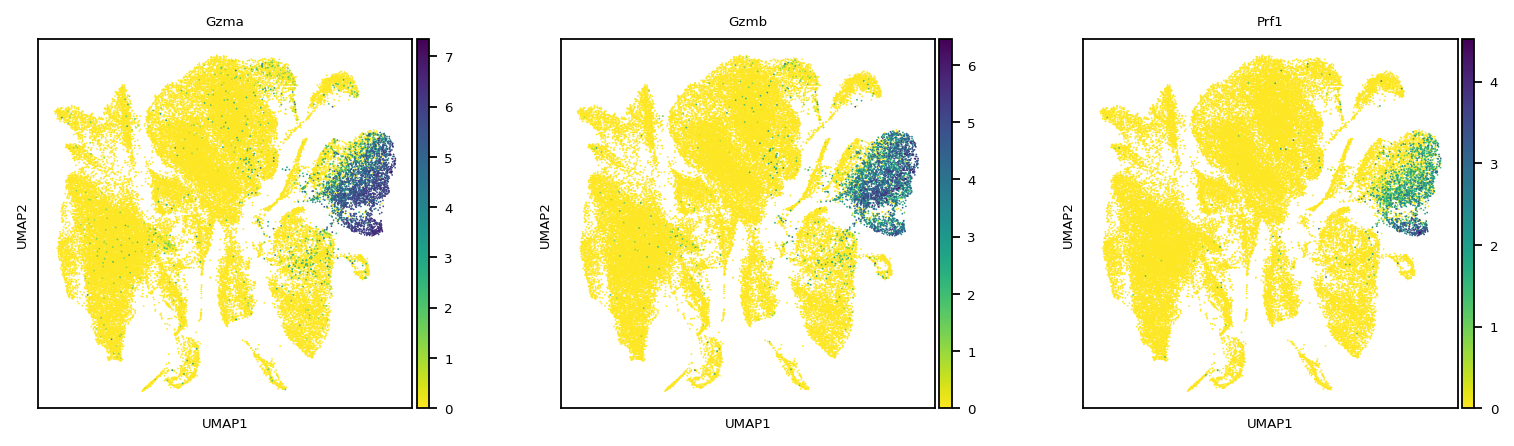

In [150]:
sc.pl.umap(heart_infection_sc_no_viral_genes, color=["Gzma", "Gzmb", "Prf1", ""], ncols=4, color_map='viridis_r')

In [1118]:
temp_data = infected_cells_only.raw.to_adata().to_df().join(infected_cells_only.obs)
temp_data["sample"] = temp_data["sample"].astype("string")
print(temp_data.shape)
temp1 = temp_data[temp_data["celltypes_leiden_0.5"].isin(["Inflamed endothelial cells"])]
print(temp1.shape)

(25, 22927)
(7, 22927)


In [581]:
endothelial_infected = infected_cells_only[infected_cells_only.obs["celltypes_leiden_0.5"].isin(["Inflamed endothelial cells"])]
sc.tl.rank_genes_groups(endothelial_infected, groupby = 'sample', groups= ["T1L-WT_Heart_D4PI"],
                        reference= 'T1L-K287T_Heart_D4PI', key_added='rank_genes_T1L-WT_vs_T1L-K287T_D4PI')
day4_K287T_infection_markers = sc.get.rank_genes_groups_df(endothelial_infected, group="T1L-WT_Heart_D4PI", key="rank_genes_T1L-WT_vs_T1L-K287T_D4PI")
day4_K287T_infection_markers_significant = day4_K287T_infection_markers[day4_K287T_infection_markers["pvals_adj"] < 0.01]
print(day4_K287T_infection_markers_significant.head(30))
print(day4_K287T_infection_markers_significant.tail(30))

ranking genes
Trying to set attribute `.uns` of view, copying.
    finished: added to `.uns['rank_genes_T1L-WT_vs_T1L-K287T_D4PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


Empty DataFrame
Columns: [names, scores, logfoldchanges, pvals, pvals_adj]
Index: []
Empty DataFrame
Columns: [names, scores, logfoldchanges, pvals, pvals_adj]
Index: []


<ipython-input-583-3ebfb016a871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


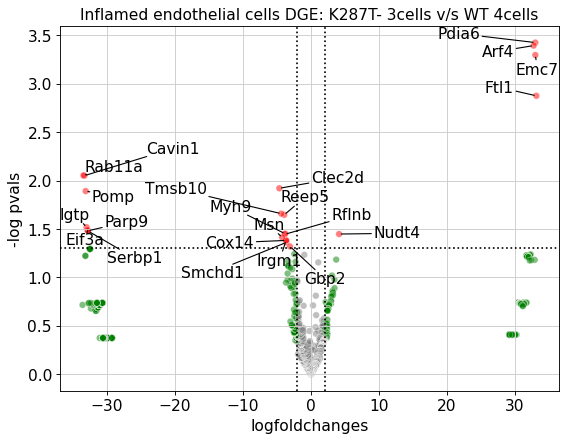

In [587]:
draw_volcano_plot(day4_K287T_infection_markers, pv = "pvals", pv_thr=0.05, title = "Inflamed endothelial cells DGE: K287T- 3cells v/s WT 4cells")

In [1154]:
np.sum(heart_infection_sc_no_viral_genes.obs["pct_viral_xGen"])

1.9526478454589722

In [602]:
heart_infection_sc_no_viral_genes

AnnData object with n_obs × n_vars = 36952 × 2228
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_sample', 'leiden_0.8', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.5', 'celltype_groups', 'stage', 'state', 'condition', '_tmp_embedding_density_column_9702_', '_tmp_embedding_density_column_6452_', '_tmp_embedding_density_column_5837_'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'dendrogram_leiden_0.5', 'hvg', 'leiden', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', '

In [636]:
reoviral_genes = [name for name in heart_infection_sc_no_viral_genes.obs.columns if name.startswith('T1L')]
print(reoviral_genes)
print(np.sum(heart_infection_sc_no_viral_genes.obs[reoviral_genes], axis=0))
print(sum(heart_infection_sc_no_viral_genes.obs["total_viral"]))

['T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3']
T1LReoS1    6
T1LReoS2    2
T1LReoS3    3
T1LReoS4    3
T1LReoM1    3
T1LReoM2    4
T1LReoM3    8
T1LReoL1    2
T1LReoL2    1
T1LReoL3    4
dtype: int64
36


In [630]:
np.sum(heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["sample"].isin(["T1L-WT_Heart_D4PI", "T1L-K287T_Heart_D4PI", "T1L-WT_Heart_D7PI", "T1L-K287T_Heart_D7PI"])].obs["n_counts"])

72483060.0

In [625]:
temp = sc.read_h5ad("./../pyobjs/heart_infection_sc_no_viral_genes_raw_counts.h5ad")
temp.obs["sample"]

AAACCCACACTAGGCC-1-Mock_Heart_D4PI              Mock_Heart_D4PI
AAACCCACACTTTAGG-1-Mock_Heart_D4PI              Mock_Heart_D4PI
AAACCCAGTGTCTTCC-1-Mock_Heart_D4PI              Mock_Heart_D4PI
AAACCCAGTGTTACAC-1-Mock_Heart_D4PI              Mock_Heart_D4PI
AAACCCAGTTACCTTT-1-Mock_Heart_D4PI              Mock_Heart_D4PI
                                                   ...         
TTTGTTGGTTAAACAG-1-T1L-K287T_Heart_D7PI    T1L-K287T_Heart_D7PI
TTTGTTGTCAACGAGG-1-T1L-K287T_Heart_D7PI    T1L-K287T_Heart_D7PI
TTTGTTGTCAGGTAAA-1-T1L-K287T_Heart_D7PI    T1L-K287T_Heart_D7PI
TTTGTTGTCATTCGGA-1-T1L-K287T_Heart_D7PI    T1L-K287T_Heart_D7PI
TTTGTTGTCTGGCTGG-1-T1L-K287T_Heart_D7PI    T1L-K287T_Heart_D7PI
Name: sample, Length: 36952, dtype: category
Categories (6, object): ['Mock_Heart_D4PI', 'T1L-WT_Heart_D4PI', 'T1L-K287T_Heart_D4PI', 'Mock_Heart_D7PI', 'T1L-WT_Heart_D7PI', 'T1L-K287T_Heart_D7PI']

In [627]:
temp[temp.obs["sample"].isin(["T1L-WT_Heart_D4PI", "T1L-K287T_Heart_D4PI", "T1L-WT_Heart_D7PI", "T1L-K287T_Heart_D7PI"])]

View of AnnData object with n_obs × n_vars = 23481 × 22690
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors'

In [644]:
def draw_volcano_plot(pdata, lfc = "logfoldchanges", pv = "pvals_adj", names = "names", lfc_thr = 2.0, pv_thr = 0.01, figsize=(8, 6), adjust = True, title = None):
    df = pdata    
    df.index = range(0, df.shape[0])
    df[pv][df[pv] < pow(10, -100)] = pow(10, -100)
    df["-log pvals"] = -1 * np.log10(df[pv])
    df["volcano"] = ["++" if ((df[lfc][i] >= lfc_thr) & (df[pv][i] < pv_thr)) 
                 else "-+" if ((df[lfc][i] <= -1*lfc_thr) & (df[pv][i] < pv_thr)) 
                 else ".+" if ((df[lfc][i] <= lfc_thr or df[lfc][i] >= -1*lfc_thr) & (df[pv][i] < pv_thr))
                 else "+." if ((df[lfc][i] >= lfc_thr or df[lfc][i] <= -1*lfc_thr) & (df[pv][i] > pv_thr))
                 else ".." for i in range(df.shape[0])]
    df["volcano"] = df["volcano"].astype("category")
    fig, ax = plt.subplots(figsize=figsize)
    color_code = {"++": "red", "+.": "green", "-+": "red", ".+": "blue", "..": "grey"}
    colors = {x:color_code[x] for x in df["volcano"].cat.categories}
    sns.scatterplot(data = df, y= "-log pvals", x = lfc, ax = ax, hue = "volcano", palette=colors, alpha = 0.5)
#     ax.legend(loc = "best", bbox_to_anchor=(1.2, 0.8))
    plt.axhline(y= -1*np.log10(pv_thr), color="black", linestyle=":")
    plt.axvline(x=-1*lfc_thr, color="black", linestyle=":")
    plt.axvline(x=lfc_thr, color="black", linestyle=":")
    ax.get_legend().remove()
    texts = []
    for i in range(df.shape[0]):
        if(df["volcano"][i] == '++' or df["volcano"][i] == '-+'):
            texts.append(plt.text(x=df[lfc][i], y=df["-log pvals"][i], s=df[names][i], color='black'))
    from adjustText import adjust_text
    if adjust:
        adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=1.0))
    plt.title(title)
    plt.show()

In [104]:
np.sum(heart_infection_sc_no_viral_genes.obs["total_viral"] > 0)

25

In [105]:
np.sum(heart_infection_sc_no_viral_genes.obs["total_viral_xGen_NA"] > 0)

2407

In [106]:
heart_infection_sc_no_viral_genes

AnnData object with n_obs × n_vars = 48455 × 2196
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_sample', 'leiden_0.8', 'leiden_0.6', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.5', 'celltypes_leiden_0.6', 'celltype_groups', '_tmp_embedding_density_column_4613_', 'embed_sensity', 'embed_density', 'umap_density_condition', 'T1LReoS1_xGen', 'T1LReoS2_xGen', 'T1LReoS3_xGen', 'T1LReoS4_xGen', 'T1LReoM1_xGen', 'T1LReoM2_xGen', 'T1LReoM3_xGen', 'T1LReoL1_xGen', 'T1LReoL2_xGen', 'T1LReoL3_xGen', 'total_viral_xGen', 'pct_viral_xGen', 'total_viral_NA', 'total_viral_xGen_NA', 'viral_exp'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'p